# BRIAN CHABARI NYAGAH.

# TANZANIA WATERWELLS PROJECT.  

##  BUSINESS UNDERSTANDING.

# 1.1 Introduction.

Access to clean and reliable water is crucial for the well-being and development of communities. In Tanzania, like many other countries, water wells play a vital role in providing this essential resource. However, ensuring the functionality and sustainability of these wells can be challenging due to various factors such as geographic location, infrastructure maintenance, and water quality.

The Tanzania Water Wells project aims to leverage data science techniques to predict the functionality of water wells across different regions in Tanzania. By analyzing historical data and identifying patterns, we can develop a predictive model that will aid in optimizing maintenance efforts, resource allocation, and decision-making processes related to water well management.

# 1.2 Problem Statement.

The main challenge faced by water authorities and organizations in Tanzania is the high number of non-functional or partially functional water wells. These dysfunctional wells result in limited access to clean water for communities, leading to health and sanitation issues, reduced agricultural productivity, and hindered economic growth.

To address this problem, the project focuses on answering the following key questions:

1. Which factors contribute most significantly to the functionality of water wells?
2. Can we accurately predict the functionality of a water well based on its geographic location, water quality, and infrastructure conditions?
3. How can we prioritize maintenance efforts and resource allocation to ensure the sustainable operation of water wells?

By providing insights and predictive capabilities, this project aims to assist water authorities, policymakers, and non-governmental organizations (NGOs) in making informed decisions to improve the functionality and sustainability of water wells across Tanzania.

# 1.3 Objective.

The objective of the Tanzania Water Wells project is to develop a predictive model that accurately determines the functionality of water wells in Tanzania. By leveraging historical data and applying data science techniques, the project aims to address the challenge of non-functional or partially functional water wells, ultimately improving access to clean water for communities.

Specifically, the project aims to achieve the following:

Develop a predictive model: Build a machine learning model that can predict the functionality of water wells based on various attributes such as geographic location, water quality, and infrastructure conditions.

Identify key factors: Determine the most significant factors that contribute to the functionality of water wells in Tanzania. By analyzing the data, the project seeks to uncover insights and correlations that can aid in understanding the underlying causes of well functionality.

Optimize maintenance efforts: Provide actionable recommendations to prioritize maintenance efforts and allocate resources effectively. By accurately predicting the functionality of water wells, the project aims to optimize the allocation of maintenance teams and resources, ensuring efficient and timely repairs.

Enable data-driven decision-making: Empower water authorities, policymakers, and NGOs with a data-driven decision-making framework. By providing insights and predictions, the project aims to facilitate informed decisions regarding water well management, resource allocation, and long-term sustainability.

# 1.4 Specific Objectives.

To aid in improving maintenance operations by focusing inspections on the water points that have a high likelihood of requiring repair or having failed altogether

To provide 70%-75% accurate predictions on the functionality of wells

To determine if functionality varies by quantity.

To determine the functionality status concerning payment type

# 1.5 Business Questions.

What is the most popular water point type?

Does functionality vary by payment type?

Does altitude affect the class of extraction type?

# 1.6 Project Success Criteria.

Build a model that meets the following criteria:

Use machine learning models to correctly classify wells with an accuracy score of 70% - 75%

# 1.7 Approach.

To tackle this business problem, we will employ data science techniques and machine learning algorithms to analyze a comprehensive dataset containing information on water wells in Tanzania. This dataset includes attributes such as the well's geographic location, operational status, water quality parameters, pump types, and construction details.

The project will involve the following key steps:

1. Data Understanding: Gaining insights into the structure, quality, and characteristics of the data to inform subsequent analysis and modeling steps.
2. Data Preparation: Cleaning and preparing the dataset, handling missing values, and ensuring data quality.
3. Exploratory Data Analysis: Gaining insights into the data, identifying correlations, and understanding the distribution of variables.
4. Feature Engineering: Selecting and transforming relevant features that can contribute to the prediction of water well functionality.
5. Model Selection and Training: Implementing and evaluating various machine learning algorithms to develop a predictive model.
6. Model Evaluation: Assessing the performance of the developed model using appropriate metrics and validating its robustness.
7. Deployment and Recommendations: Utilizing the model to predict the functionality of new water wells and providing actionable recommendations for maintenance prioritization and resource allocation.

# 2.0 DATA UNDERTANDING. 


# 2.1 Data Description.

The target variable is status_group with the labels:

1. functional - the waterpoint is operational and there are no repairs needed
2. functional needs repair - the waterpoint is operational, but needs repairs
3. non functional - the waterpoint is not operational

The predictor variables in this data include:

1. amount_tsh - Total static head (amount water available to waterpoint)
2. date_recorded - The date the row was entered
3. funder - Who funded the well
4. gps_height - Altitude of the well
5. installer - Organization that installed the well
6. longitude - GPS coordinate
7. latitude - GPS coordinate
8. wpt_name - Name of the waterpoint if there is one
9. num_private -
10. basin - Geographic water basin
11. subvillage - Geographic location
12. region - Geographic location
13. region_code - Geographic location (coded)
14. district_code - Geographic location (coded)
15. lga - Geographic location
16. ward - Geographic location
17. population - Population around the well
18. public_meeting - True/False
19. recorded_by - Group entering this row of data
20. scheme_management - Who operates the waterpoint
21. scheme_name - Who operates the waterpoint
22. permit - If the waterpoint is permitted
23. construction_year - Year the waterpoint was constructed
24. extraction_type - The kind of extraction the waterpoint uses
25. extraction_type_group - The kind of extraction the waterpoint uses
26. extraction_type_class - The kind of extraction the waterpoint uses
27. management - How the waterpoint is managed
28. management_group - How the waterpoint is managed
29. payment - What the water costs
30. payment_type - What the water costs
31. water_quality - The quality of the water
32. quality_group - The quality of the water
33. quantity - The quantity of water
34. quantity_group - The quantity of water
35. source - The source of the water
36. source_type - The source of the water
37. source_class - The source of the water
38. waterpoint_type - The kind of waterpoint
39. waterpoint_type_group - The kind of waterpoint

# 2.2 Importing Libraries and loading data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the training_set_values
training_data = pd.read_csv('training_set_values.csv')

# Loading the test set values
testing_data = pd.read_csv('test_set_values.csv')

# Loading the target column
training_labels = pd.read_csv('training_set_labels.csv')

# concatenating train and test data
training_labels_df = pd.concat([training_data, training_labels],axis=1)

# merging the data sets
data = training_data.merge(training_labels, how = "inner")

# previewing the data set
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
# previewing the last five rows of the data
data.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [4]:
# getting the shape of the data
print(f" This data has {data.shape[0]} rows and {data.shape[1]} columns")

 This data has 59400 rows and 41 columns


In [5]:
#previewing the types of columns. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
# Evaluating Numerical columns, summary statistics. 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


In [7]:
# Getting the data types of the data
data.dtypes.value_counts()

object     31
int64       7
float64     3
dtype: int64

# 3.0 DATA PREPARATION. 

# 3.1 Selecting the features relevant to analysis and grouping them into categorical and numerical columns. 

# The numerical columns selected are:

1. amount_tsh.

2. construction_year.

3. longitude.

4. latitude.

5. gps_height.

6. population.



# The categorical columns selected are:

1. scheme_management

2. extraction_type_class

3. payment

4. water_quality

5. funder

6. source_type

7. waterpoint_type_group

8. status_group

9. installer

10. date_recorded

11. basin

12. region

13. quantity


In [8]:
# Creating dataframe for slected data.

Tz = data.loc[:, [  "amount_tsh", "construction_year", "longitude", "latitude", "gps_height", "population", "scheme_management",
                        "extraction_type_class", "payment", "water_quality", "funder", "source_type", "waterpoint_type_group", 
                        "status_group", "installer", "date_recorded", "basin", "region", "quantity" ]]

#previewing the slected data.

Tz.head()



,amount_tsh,construction_year,longitude,latitude,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,funder,source_type,waterpoint_type_group,status_group,installer,date_recorded,basin,region,quantity
0,6000.0,1999,34.938093,-9.856322,1390,109,VWC,gravity,pay annually,soft,Roman,spring,communal standpipe,functional,Roman,2011-03-14,Lake Nyasa,Iringa,enough
1,0.0,2010,34.698766,-2.147466,1399,280,Other,gravity,never pay,soft,Grumeti,rainwater harvesting,communal standpipe,functional,GRUMETI,2013-03-06,Lake Victoria,Mara,insufficient
2,25.0,2009,37.460664,-3.821329,686,250,VWC,gravity,pay per bucket,soft,Lottery Club,dam,communal standpipe,functional,World vision,2013-02-25,Pangani,Manyara,enough
3,0.0,1986,38.486161,-11.155298,263,58,VWC,submersible,never pay,soft,Unicef,borehole,communal standpipe,non functional,UNICEF,2013-01-28,Ruvuma / Southern Coast,Mtwara,dry
4,0.0,0,31.130847,-1.825359,0,0,NaN,gravity,never pay,soft,Action In A,rainwater harvesting,communal standpipe,functional,Artisan,2011-07-13,Lake Victoria,Kagera,seasonal


In [9]:
# getting the shape of the newly selected data.
print(f" This data has {Tz.shape[0]} rows and {Tz.shape[1]} columns")

 This data has 59400 rows and 19 columns


# 3.2 Data Cleaning. 

## 3.2.1 Checking and handling duplicated values. 

In [10]:
# Checking for duplicates.

def check_duplicates(df, columns):
    duplicated_rows = df[columns].duplicated()
    count = duplicated_rows.sum()
    return count

duplicates_count = check_duplicates(Tz, ['latitude', 'longitude'])
print("Number of duplicates:", duplicates_count)

Number of duplicates: 1880


In [11]:
#dropping duplicates. 

Tz = Tz.drop_duplicates(subset = ["latitude", "longitude"])

# Confirming dropped duplicates.

Tz[['latitude', 'longitude']].duplicated().sum()

0

The data is now free of duplicates.

## 3.2.2 Checking and handling Missing values.

In [12]:
#function for identifying with missing values
def missing_values(df):
    
    miss_val = df.isna().sum().sort_values(ascending = False)
    percentage = (df.isna().sum() / len(df)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values

#calling the function
missing_values(Tz)

,Missing Values,In Percentage
scheme_management,3750,0.065195
installer,3623,0.062987
funder,3609,0.062743


Here is the breakdown of missing values in the respective columns:

1. scheme_management': There are 3750 missing values, which accounts for approximately 0.065195% of the total rows.
2. installer': There are 3623 missing values, which accounts for approximately 0.062987% of the total rows.
3. funder': There are 3609 missing values, which accounts for approximately 0.062743% of the total rows.

These columns may require further investigation or appropriate handling to address the missing values in your data analysis or modeling process.

In [13]:
#dropping the rows of the other columns with missing values
Tz = Tz.dropna()
Tz.head()

,amount_tsh,construction_year,longitude,latitude,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,funder,source_type,waterpoint_type_group,status_group,installer,date_recorded,basin,region,quantity
0,6000.0,1999,34.938093,-9.856322,1390,109,VWC,gravity,pay annually,soft,Roman,spring,communal standpipe,functional,Roman,2011-03-14,Lake Nyasa,Iringa,enough
1,0.0,2010,34.698766,-2.147466,1399,280,Other,gravity,never pay,soft,Grumeti,rainwater harvesting,communal standpipe,functional,GRUMETI,2013-03-06,Lake Victoria,Mara,insufficient
2,25.0,2009,37.460664,-3.821329,686,250,VWC,gravity,pay per bucket,soft,Lottery Club,dam,communal standpipe,functional,World vision,2013-02-25,Pangani,Manyara,enough
3,0.0,1986,38.486161,-11.155298,263,58,VWC,submersible,never pay,soft,Unicef,borehole,communal standpipe,non functional,UNICEF,2013-01-28,Ruvuma / Southern Coast,Mtwara,dry
5,20.0,2009,39.172796,-4.765587,0,1,VWC,submersible,pay per bucket,salty,Mkinga Distric Coun,other,communal standpipe,functional,DWE,2011-03-13,Pangani,Tanga,enough


In [14]:
#confirming if there any missing values
missing_values(Tz)

,Missing Values,In Percentage


The data is now free of missing values. 

## 3.2.3 Dealing with invalid data formats. 

In [15]:
#checking the data types for columns.

Tz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50154 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             50154 non-null  float64
 1   construction_year      50154 non-null  int64  
 2   longitude              50154 non-null  float64
 3   latitude               50154 non-null  float64
 4   gps_height             50154 non-null  int64  
 5   population             50154 non-null  int64  
 6   scheme_management      50154 non-null  object 
 7   extraction_type_class  50154 non-null  object 
 8   payment                50154 non-null  object 
 9   water_quality          50154 non-null  object 
 10  funder                 50154 non-null  object 
 11  source_type            50154 non-null  object 
 12  waterpoint_type_group  50154 non-null  object 
 13  status_group           50154 non-null  object 
 14  installer              50154 non-null  object 
 15  da

Observation; Some of the object columns need to be coverted to categorical.

In [16]:
# Type casting some string objects to categorical 

for col in ['basin', 'region', 'extraction_type_class', 'scheme_management',
            'payment', 'quantity', 'source_type','water_quality', 'funder','source_type', 'installer',
            'waterpoint_type_group', 'status_group']:
    Tz[col] = Tz[col].astype('category')
    
Tz.dtypes

amount_tsh                float64
construction_year           int64
longitude                 float64
latitude                  float64
gps_height                  int64
population                  int64
scheme_management        category
extraction_type_class    category
payment                  category
water_quality            category
funder                   category
source_type              category
waterpoint_type_group    category
status_group             category
installer                category
date_recorded              object
basin                    category
region                   category
quantity                 category
dtype: object

# 4.0 EXPLORATORY DATA ANALYSIS. 

In the Exploratory Data Analysis (EDA) phase, we delve into understanding the dataset and gaining insights from its structure and content. Through visualizations, statistical summaries, and data exploration techniques, we aim to uncover patterns, relationships, and potential outliers within the data.

## 4.1 Univariate Analysis.

### Funder.

In [17]:
# Finding ou number of unique project funders. 
unique_funders = Tz['funder'].nunique()
print("There are {} unique values of funder".format(unique_funders))


There are 1707 unique values of funder


In [18]:
# Function to display the top ten funders of projects.

def display_top_funders(data, n=10):
    top_funders = Tz['funder'].value_counts().head(n)
    print(f"Top {n} Funders:")
    print(top_funders)


display_top_funders(Tz, n=10)


Top 10 Funders:
Government Of Tanzania    8310
Danida                    3108
Hesawa                    1502
Kkkt                      1268
World Bank                1243
World Vision              1112
Unicef                    1013
District Council           816
Private Individual         803
Tasaf                      800
Name: funder, dtype: int64


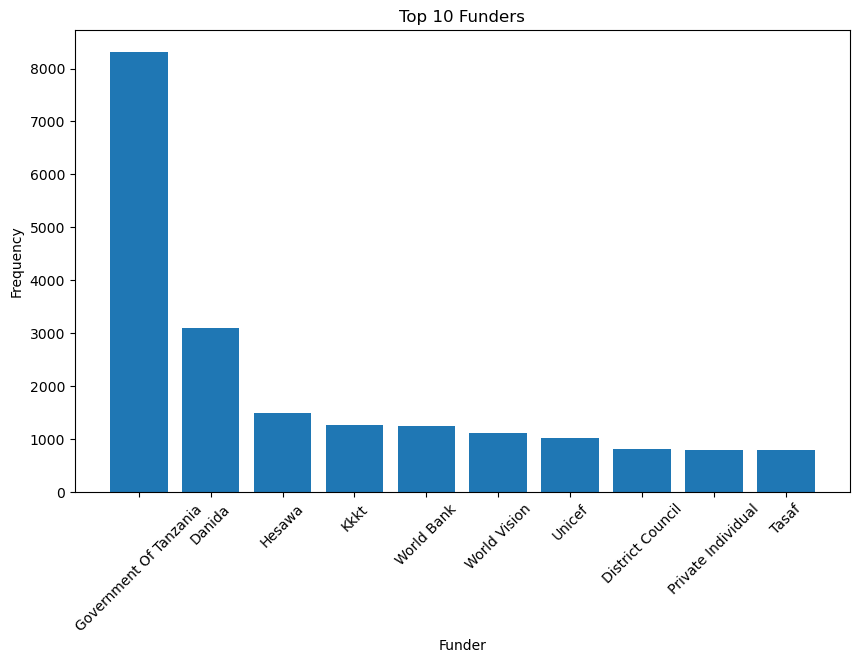

In [19]:
# Plotting the top ten funders for wells.

def display_top_funders(data, n=10):
    top_funders = Tz['funder'].value_counts().head(n)

    # Plotting the top funders
    plt.figure(figsize=(10, 6))
    plt.bar(top_funders.index, top_funders.values)
    plt.title('Top 10 Funders')
    plt.xlabel('Funder')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    return top_funders


top_funders = display_top_funders(Tz, n=10)


### Installer.

In [20]:
# Finding out number of unique well installers. 

unique_installers = Tz['installer'].nunique()
print("There are {} unique values of installers".format(unique_installers))


There are 1968 unique values of installers


In [21]:
# To check the first common 100 values sum.

Tz['installer'].value_counts().head(100).sum() 

39210

From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

In [22]:
# Replacing the spelling mistakes and collect same categories in same name

Tz['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

Tz['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
Tz['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

Tz['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

Tz['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

Tz['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

Tz['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

Tz['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
Tz['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

Tz['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

Tz['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

Tz['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

Tz['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [23]:
# continue to replacing spellin mistakes and getting together values
Tz['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
Tz['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
Tz['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
Tz['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
Tz['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
Tz['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
Tz['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
Tz['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
Tz['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
Tz['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [24]:
# percentage of seeing value counts of installer column.

(39213*100)/59400 

66.01515151515152

Checked the first 100 value counts of installer column after realizing some installer names are written with mistake and given as different like 'Village Government' and 'Village government'. So, I changed the values which I realied. The first 100 value counts contains 39213 values. It means 66% of data is checked.

In [25]:
# displaying top ten installers.

top_10_installers = Tz['installer'].value_counts().head(10)
print(top_10_installers)


DWE                   14207
Government             2475
Community              1641
DANIDA                 1598
HESAWA                 1228
District council       1172
Central government     1101
RWE                    1006
KKKT                    890
0                       760
Name: installer, dtype: int64


In [26]:
# Creating new dataframe which just picks our desired values

df_1 = Tz.loc[Tz['installer']== 'DWE']
df_2 = Tz.loc[Tz['installer']== 'Government']              
df_3 = Tz.loc[Tz['installer']== 'Community'] 
df_4 = Tz.loc[Tz['installer']== 'DANIDA'] 
df_5 = Tz.loc[Tz['installer']== 'HESAWA']
df_6 = Tz.loc[Tz['installer']== 'District council'] 
df_7 = Tz.loc[Tz['installer']== 'Central government'] 
df_8 = Tz.loc[Tz['installer']== 'RWE'] 
df_9 = Tz.loc[Tz['installer']== 'KKKt']
df_10 = Tz.loc[Tz['installer']== 'Unknown'] 
 

Installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10], ignore_index=True)

### Construction_year

In [27]:
Tz['construction_year'].value_counts()

0       15302
2008     2514
2009     2392
2010     2326
2000     1496
2007     1484
2006     1381
2003     1213
2011     1171
2004     1059
1978     1021
2002     1009
2012      998
2005      942
1999      921
1995      892
1998      867
1985      803
1984      722
1982      699
1972      692
1994      682
1990      653
1996      640
1974      634
1992      611
1980      591
1997      533
1993      525
1988      499
2001      496
1983      467
1975      425
1986      400
1976      378
1991      304
1970      304
1989      302
1987      284
1981      221
1977      186
1973      184
1979      173
2013      165
1971      125
1963       84
1967       83
1968       74
1969       59
1960       44
1964       40
1962       28
1961       21
1965       19
1966       16
Name: construction_year, dtype: int64

The year values are converted to decades for future encoding. Zero shows the missing values. This have majority of the data set so, it will not be changed to the mean or median, kept as new value in decades.

In [28]:
# creating new column decade. 
Tz['decade'] = Tz['construction_year'] 

In [29]:
# dividing the column decades

Tz['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
Tz['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
Tz['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
Tz['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
Tz['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
Tz['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [30]:
Tz['decade'].value_counts()

0      15302
00s    13986
90s     6628
80s     4988
10s     4660
70s     4122
60s      468
Name: decade, dtype: int64

In [31]:
# finding mean and median without zero values.

Tz.loc[Tz['construction_year']!=0].describe() 

,amount_tsh,construction_year,longitude,latitude,gps_height,population
count,34852.000000,34852.000000,34852.000000,34852.000000,34852.000000,34852.000000
mean,494.568382,1996.951739,35.971825,-6.248300,1016.856421,263.210748
std,3221.142446,12.521756,2.620343,2.764975,615.985508,553.496725
min,0.000000,1960.000000,29.607122,-11.649440,-63.000000,0.000000
25%,0.000000,1987.000000,34.654506,-8.799896,411.000000,30.000000
50%,0.000000,2000.000000,36.699994,-6.106558,1159.000000,140.000000
75%,200.000000,2008.000000,37.884698,-3.638528,1490.000000,300.000000
max,250000.000000,2013.000000,40.323402,-1.104943,2770.000000,30500.000000


In [32]:
#changing the zero values in construction year column.

Tz['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)


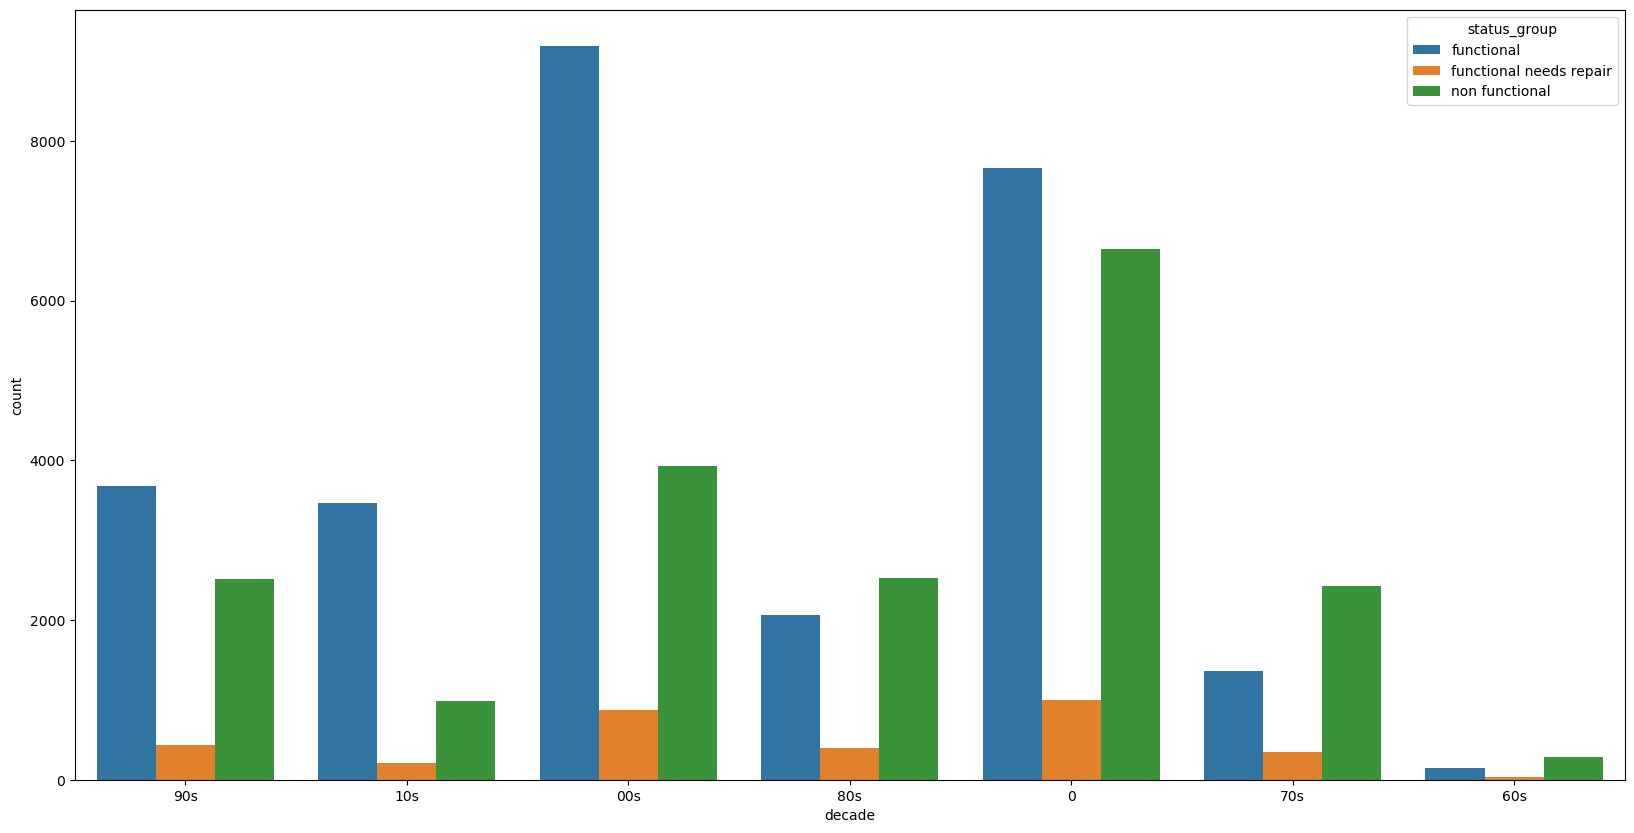

In [33]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=Tz)

### Amount_tsh

In [34]:
# Summary statistics of amount_tsh
Tz.amount_tsh.describe().T

count     50154.000000
mean        356.730802
std        2849.706341
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max      250000.000000
Name: amount_tsh, dtype: float64

In [35]:
Tz['amount_tsh'].value_counts()

0.0         33448
500.0        2854
50.0         2279
1000.0       1392
20.0         1388
            ...  
53.0            1
306.0           1
8500.0          1
138000.0        1
59.0            1
Name: amount_tsh, Length: 97, dtype: int64

In [36]:
Tz['amount_tsh'].value_counts()/Tz['amount_tsh'].count()

0.0         0.666906
500.0       0.056905
50.0        0.045440
1000.0      0.027755
20.0        0.027675
              ...   
53.0        0.000020
306.0       0.000020
8500.0      0.000020
138000.0    0.000020
59.0        0.000020
Name: amount_tsh, Length: 97, dtype: float64

Text(0.5, 0.98, 'The distribution of amount_tsh')

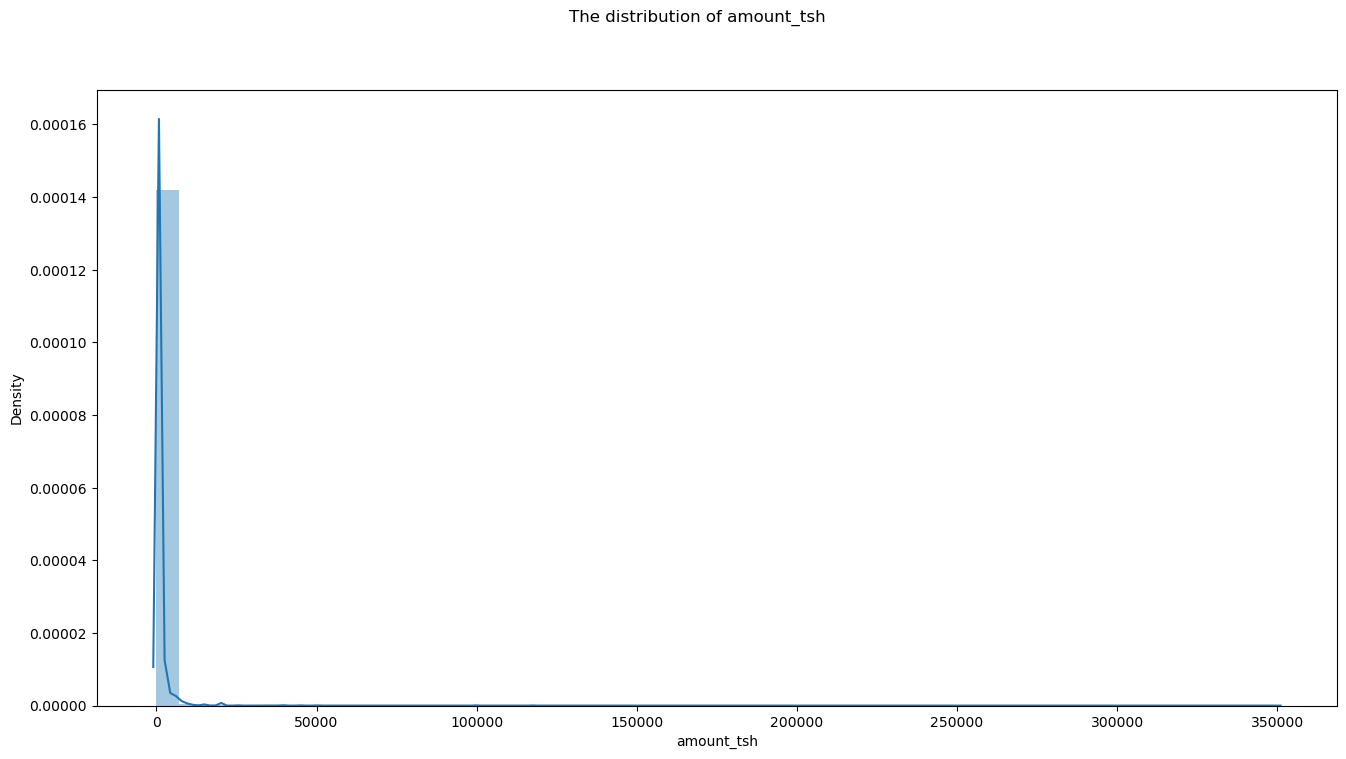

In [37]:
# The distribution of amount_tsh
plt.figure(figsize=(16,8))
sns.distplot(data.amount_tsh)
plt.suptitle("The distribution of amount_tsh")

I decided to drop this column because 66.6% of the column has no informative values. So, this column will not give idea to my model and will drop it.

In [38]:
Tz.drop(columns=['amount_tsh'], inplace=True)

In [39]:
Tz.head()

,construction_year,longitude,latitude,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,funder,source_type,waterpoint_type_group,status_group,installer,date_recorded,basin,region,quantity,decade
0,1999,34.938093,-9.856322,1390,109,VWC,gravity,pay annually,soft,Roman,spring,communal standpipe,functional,Roman,2011-03-14,Lake Nyasa,Iringa,enough,90s
1,2010,34.698766,-2.147466,1399,280,Other,gravity,never pay,soft,Grumeti,rainwater harvesting,communal standpipe,functional,GRUMETI,2013-03-06,Lake Victoria,Mara,insufficient,10s
2,2009,37.460664,-3.821329,686,250,VWC,gravity,pay per bucket,soft,Lottery Club,dam,communal standpipe,functional,world vision,2013-02-25,Pangani,Manyara,enough,00s
3,1986,38.486161,-11.155298,263,58,VWC,submersible,never pay,soft,Unicef,borehole,communal standpipe,non functional,Unicef,2013-01-28,Ruvuma / Southern Coast,Mtwara,dry,80s
5,2009,39.172796,-4.765587,0,1,VWC,submersible,pay per bucket,salty,Mkinga Distric Coun,other,communal standpipe,functional,DWE,2011-03-13,Pangani,Tanga,enough,00s


amount_tsh column succesfully dropped. 

### Gps_height

In [40]:
Tz.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,806.553317
functional needs repair,744.218353
non functional,601.385002


In [41]:
Tz['gps_height'].value_counts()

 0       15250
-15         50
 1290       47
 1269       45
 1295       45
         ...  
 2568        1
 2417        1
 2248        1
 2285        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64

There are 15250 zero values but the assumption is that the water points are at the sea level.

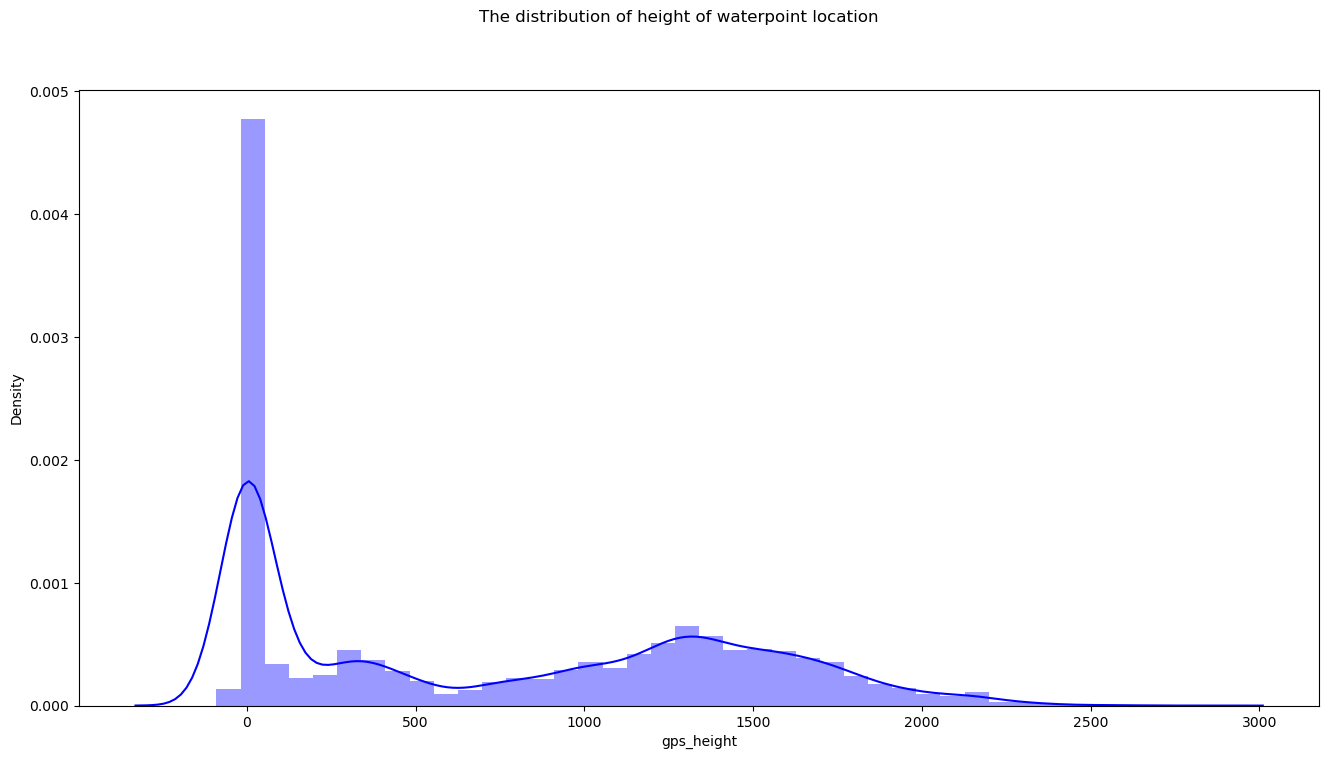

In [42]:
# plotting the distribution of gps_height.

plt.figure(figsize=(16,8))
sns.distplot(Tz.gps_height, color = "blue")
plt.suptitle("The distribution of height of waterpoint location")
plt.show()

### Extraction_type_class

In [43]:
#getting the value counts.

Tz['extraction_type_class'].value_counts()

gravity         24135
handpump        12791
submersible      5519
other            4589
motorpump        2635
rope pump         373
wind-powered      112
Name: extraction_type_class, dtype: int64

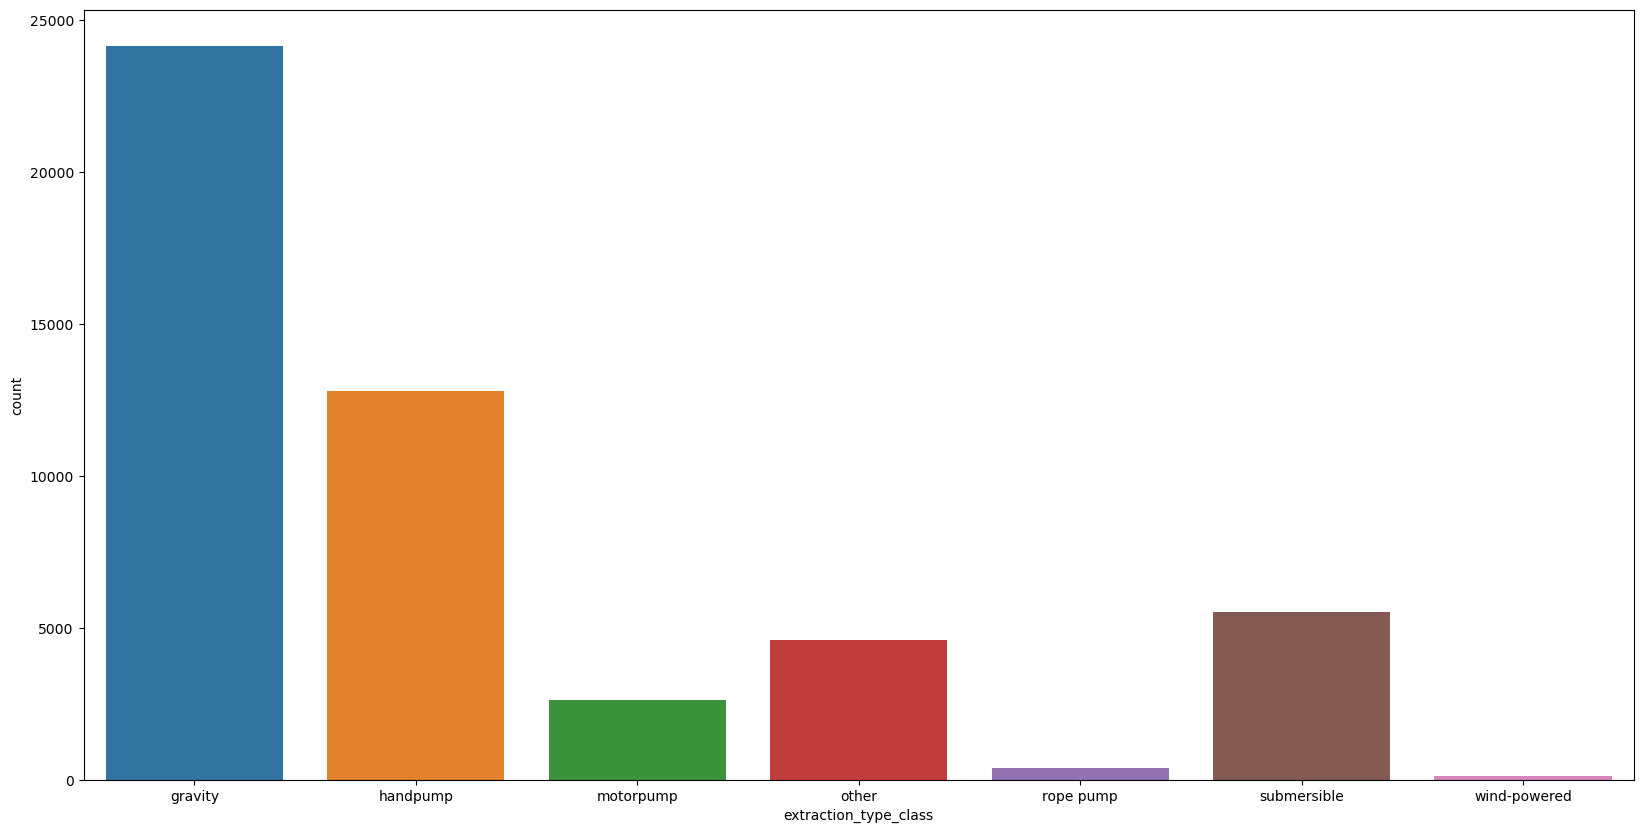

In [44]:
#Visualizing extraction_class_type column.
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', data=Tz)

Gravity is the most popular extraction type followed by handpump then motorpump.

### Population.

In [45]:
Tz['population'].value_counts()

0       16190
1        5882
150      1786
200      1615
250      1499
        ...  
1885        1
2314        1
646         1
1942        1
788         1
Name: population, Length: 1020, dtype: int64

In [46]:
Tz.loc[Tz['population']==0].groupby('status_group').count()

,construction_year,longitude,latitude,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,funder,source_type,waterpoint_type_group,installer,date_recorded,basin,region,quantity,decade
status_group,,,,,,,,,,,,,,,,,,
functional,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503,8503
functional needs repair,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010,1010
non functional,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677,6677


It does not make logical sense to have a functional waterpoint with zero population. Therefore replacing the zero values with mean. 

In [47]:
summary_statistics = Tz['population'].describe()
print("Total number of people around the wells is",summary_statistics[0])
print("\n")
print("The average number of people living around the wells is",summary_statistics[1])
print("\n")
print("The minimum population value is",summary_statistics[3])
print("\n")
print("The maximum population value is",summary_statistics[7])

Total number of people around the wells is 50154.0


The average number of people living around the wells is 186.54526059736014


The minimum population value is 0.0


The maximum population value is 30500.0


In [48]:
#replacing the zeros with mean. 

Tz['population'].replace(to_replace = 0 , value = 186.54526059736014, inplace=True) 

In [49]:
Tz.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,construction_year,longitude,latitude,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,funder,source_type,waterpoint_type_group,installer,date_recorded,basin,region,quantity,decade
status_group,,,,,,,,,,,,,,,,,,
functional,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
functional needs repair,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
non functional,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


The most populated areas were found to be around the functional water points.

###  Payment. 

In [50]:
Tz['payment'].value_counts()

never pay                20779
pay per bucket            8508
pay monthly               7590
unknown                   5248
pay when scheme fails     3688
pay annually              3476
other                      865
Name: payment, dtype: int64

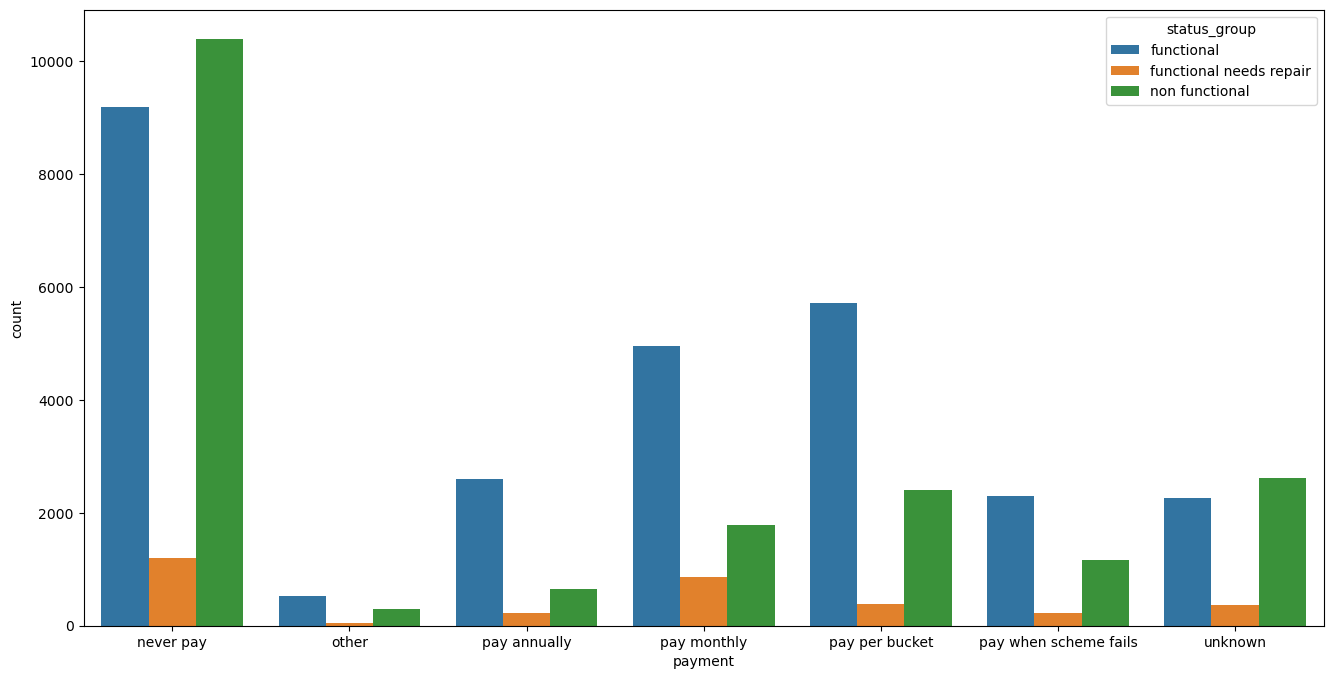

In [51]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='payment', hue="status_group", data=Tz)

Most of the water is never paid for.

### Water_quality.

In [52]:
Tz['water_quality'].value_counts()

soft                  44034
salty                  4311
unknown                 780
milky                   324
coloured                321
salty abandoned         209
fluoride                163
fluoride abandoned       12
Name: water_quality, dtype: int64

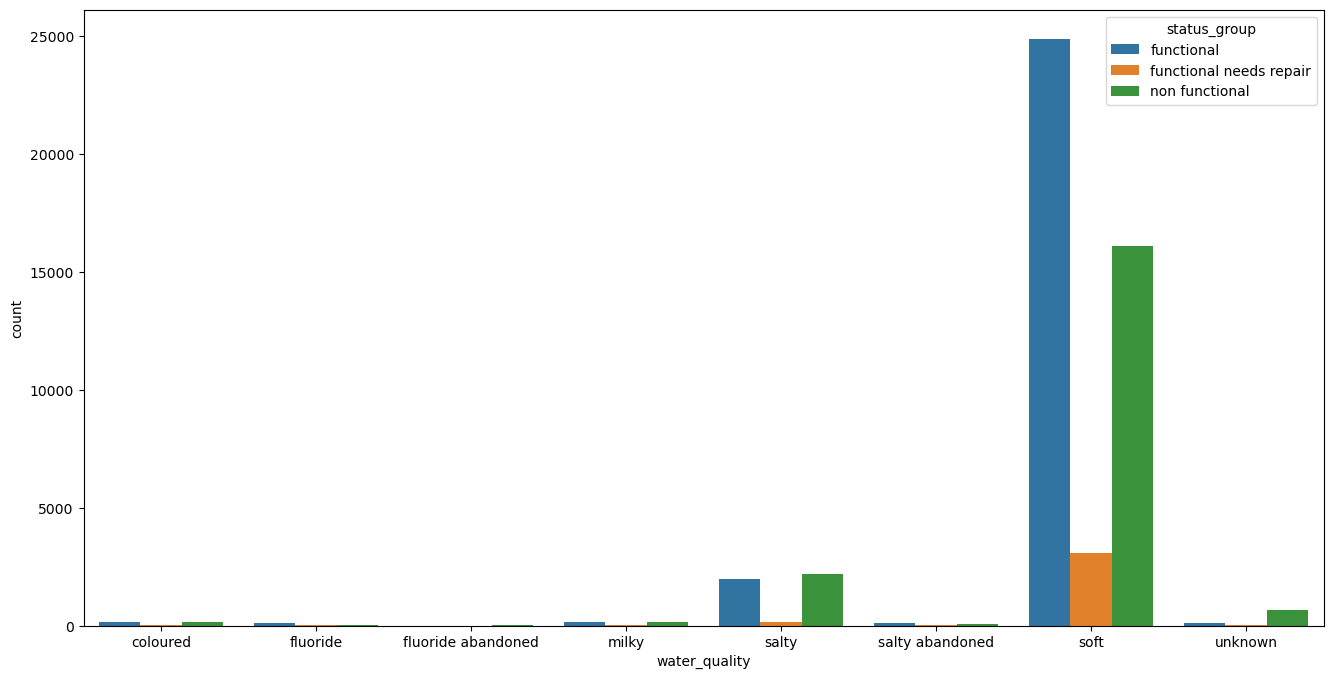

In [53]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='water_quality', hue="status_group", data=Tz)

A majority of the waterpoints produced soft water. 

### Quantity. 

In [54]:
Tz['quantity'].value_counts()

enough          29412
insufficient    12038
dry              5270
seasonal         3066
unknown           368
Name: quantity, dtype: int64

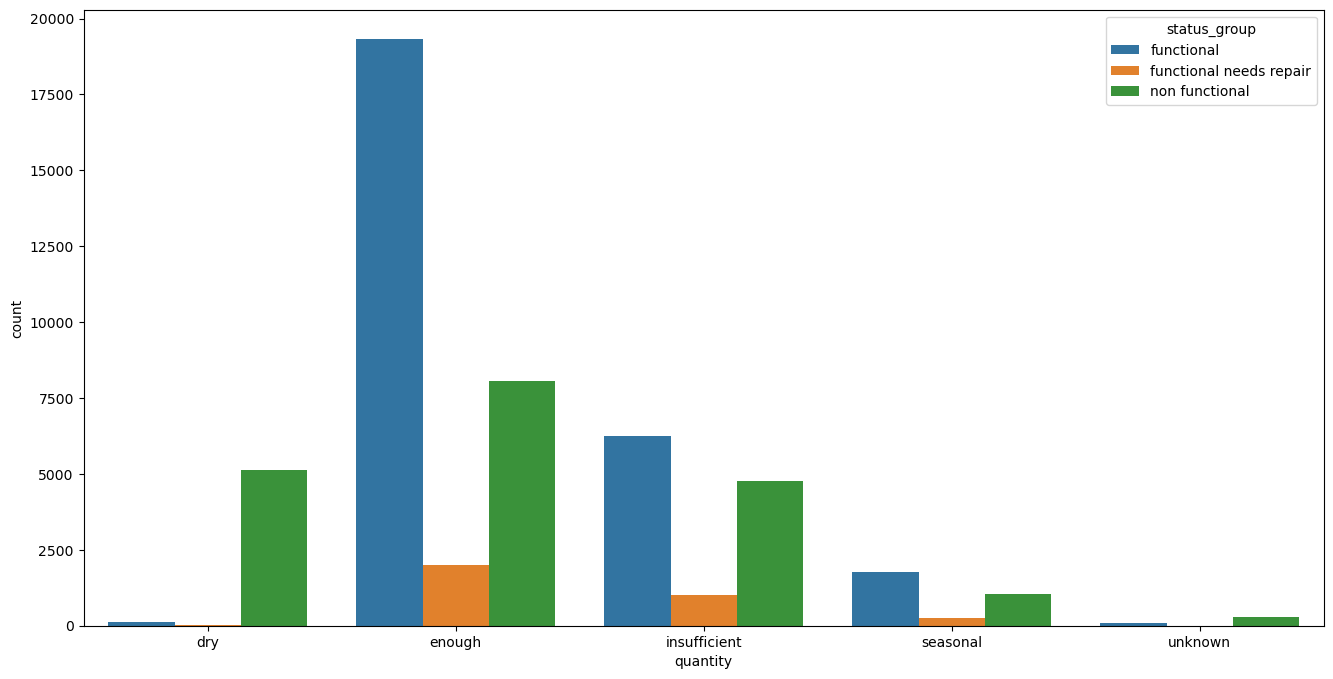

In [55]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='quantity', hue="status_group", data=Tz)

Majority of the functional wells provided enough water. However, there is an alarming number of non functional wells.

### Source_type.

In [56]:
Tz['source_type'].value_counts()

spring                  15590
shallow well            12358
borehole                10358
river/lake               9209
rainwater harvesting     1795
dam                       627
other                     217
Name: source_type, dtype: int64

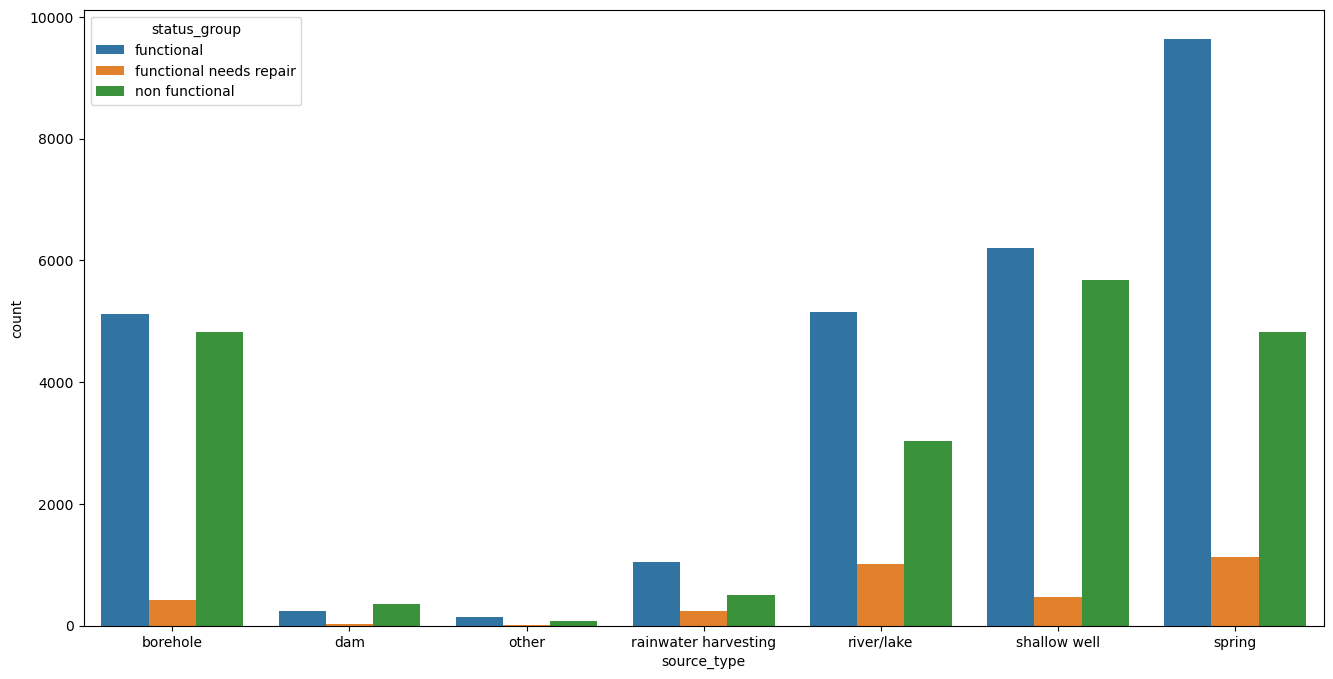

In [57]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='source_type', hue="status_group", data=Tz)

### region.

In [58]:
Tz['region'].value_counts()

Iringa           5225
Kilimanjaro      4352
Shinyanga        3190
Arusha           2972
Morogoro         2942
Kagera           2844
Kigoma           2789
Mbeya            2699
Ruvuma           2619
Tanga            2545
Pwani            2496
Dodoma           2191
Mwanza           1918
Tabora           1915
Rukwa            1783
Mara             1715
Mtwara           1542
Manyara          1487
Lindi            1119
Singida          1051
Dar es Salaam     760
Name: region, dtype: int64

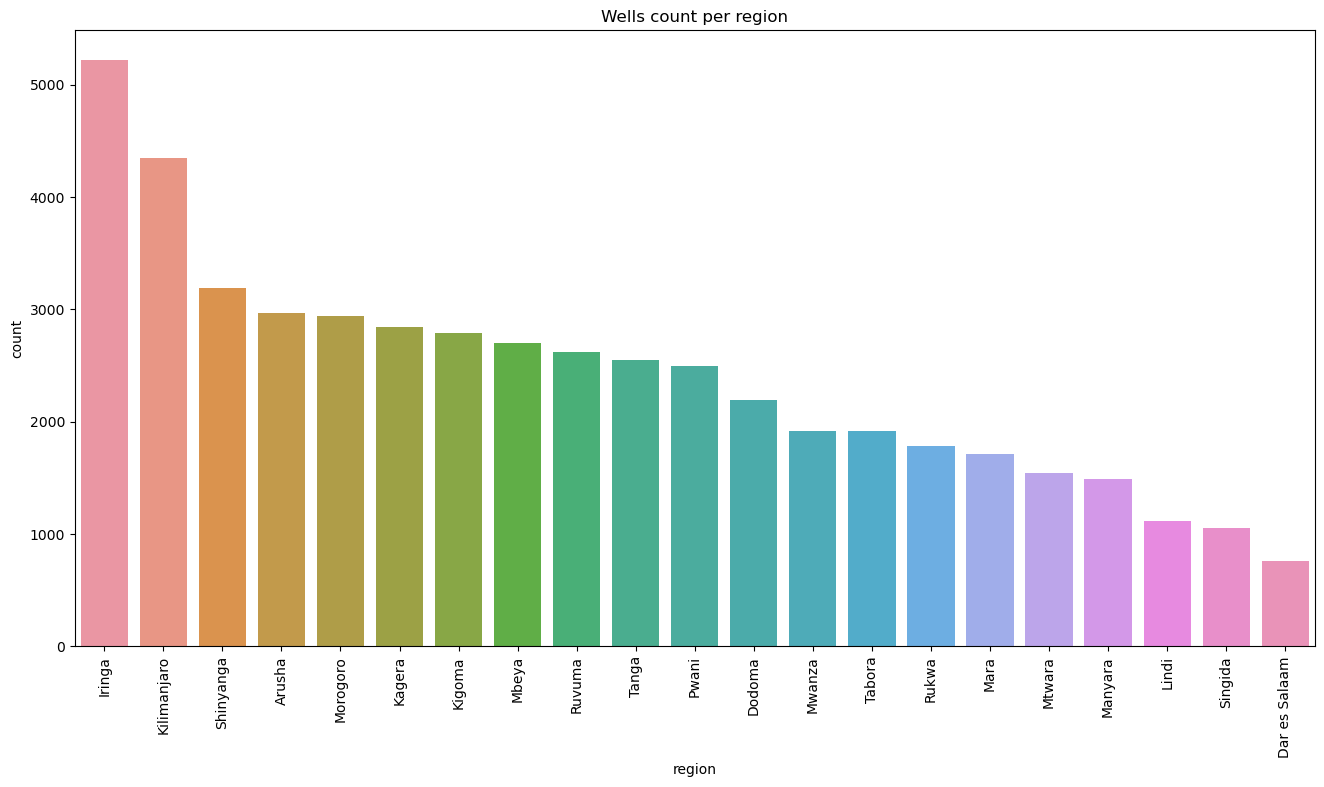

In [59]:
# Displaying distribution per region.

plt.figure(figsize=(16,8))
sns.countplot(x = Tz.region,
              order = Tz['region'].value_counts().index).set(title="Wells count per region")
plt.xticks(rotation=90);

### scheme_management.

In [60]:
Tz['scheme_management'].value_counts()

VWC                 33234
WUG                  4208
Water authority      3065
WUA                  2655
Water Board          2530
Parastatal           1453
Private operator     1047
Company              1039
Other                 753
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

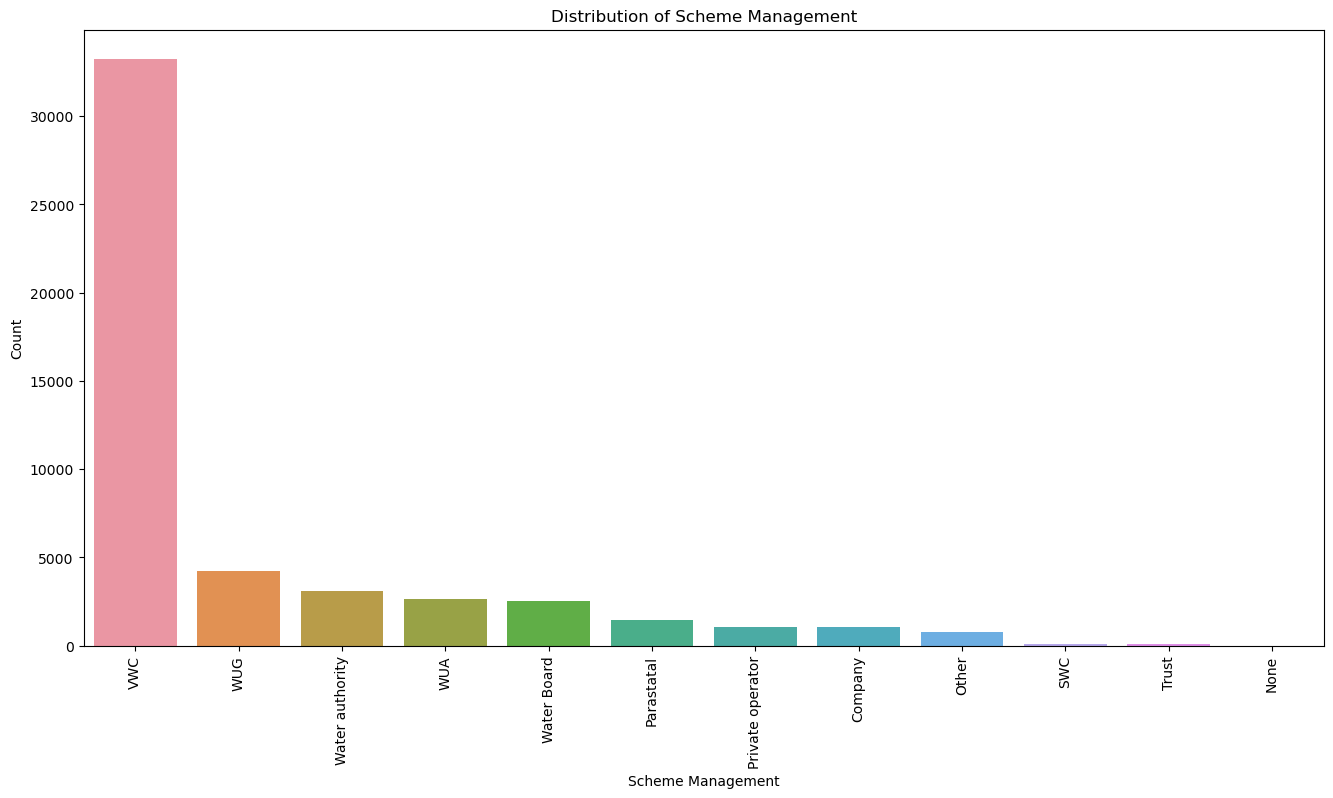

In [61]:
# Visualizing scheme_management.

plt.figure(figsize=(16, 8))
sns.countplot(x='scheme_management', data=Tz, order=Tz['scheme_management'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.title('Distribution of Scheme Management')
plt.show()


In [62]:
Tz.head()

,construction_year,longitude,latitude,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,funder,source_type,waterpoint_type_group,status_group,installer,date_recorded,basin,region,quantity,decade
0,1999,34.938093,-9.856322,1390,109.0,VWC,gravity,pay annually,soft,Roman,spring,communal standpipe,functional,Roman,2011-03-14,Lake Nyasa,Iringa,enough,90s
1,2010,34.698766,-2.147466,1399,280.0,Other,gravity,never pay,soft,Grumeti,rainwater harvesting,communal standpipe,functional,GRUMETI,2013-03-06,Lake Victoria,Mara,insufficient,10s
2,2009,37.460664,-3.821329,686,250.0,VWC,gravity,pay per bucket,soft,Lottery Club,dam,communal standpipe,functional,world vision,2013-02-25,Pangani,Manyara,enough,00s
3,1986,38.486161,-11.155298,263,58.0,VWC,submersible,never pay,soft,Unicef,borehole,communal standpipe,non functional,Unicef,2013-01-28,Ruvuma / Southern Coast,Mtwara,dry,80s
5,2009,39.172796,-4.765587,0,1.0,VWC,submersible,pay per bucket,salty,Mkinga Distric Coun,other,communal standpipe,functional,DWE,2011-03-13,Pangani,Tanga,enough,00s


## 4.2 Bivariate Analysis.

### Relationship between waterpoint_type and status_group

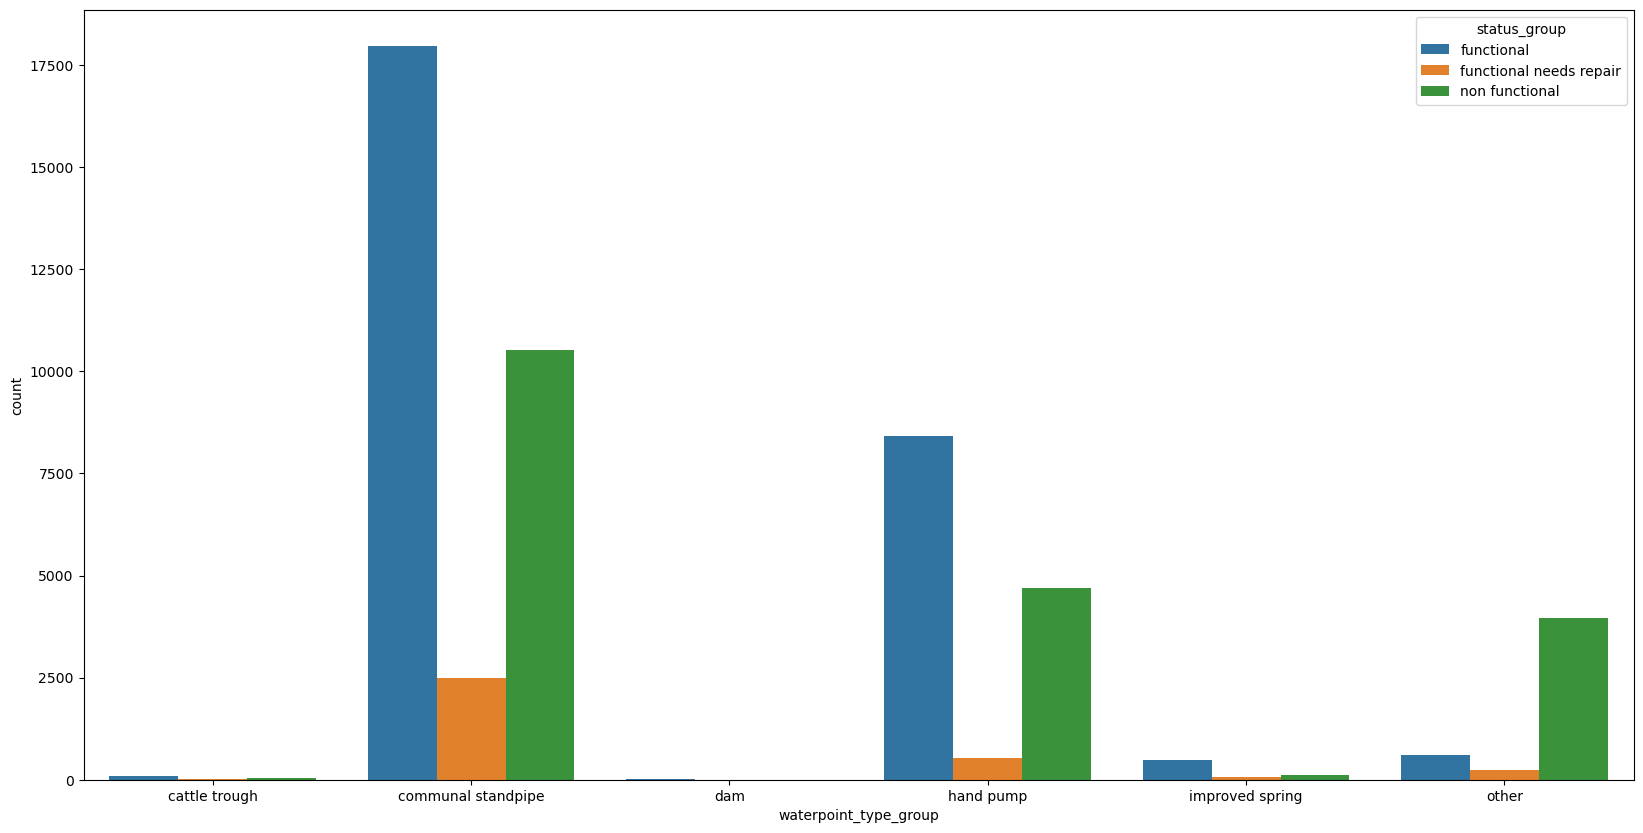

In [63]:
#comparing the water point type with the status_group.

plt.figure(figsize=(20,10))
sns.countplot(x='waterpoint_type_group', hue="status_group", data=Tz)
plt.show()

Communal standpipe has more count and functional water points are generally more than the others in except communal standpipe and other. This may be due to the fact that is is the most popular water point.

### Relationship between population and status_group.

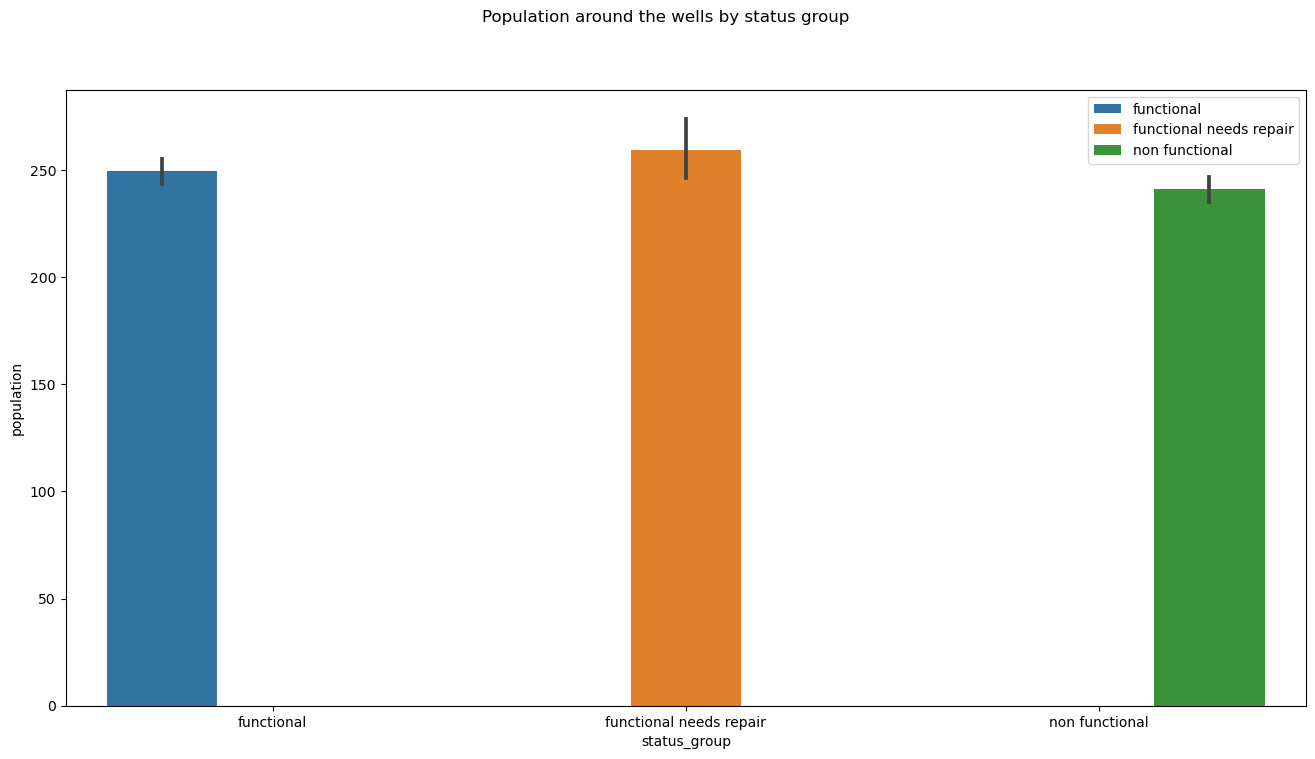

In [64]:
# plotting the relationship between population and status group
plt.subplots(figsize = (16,8))
sns.barplot(data = Tz,x = 'status_group', y = 'population', hue = "status_group")
plt.suptitle("Population around the wells by status group")
plt.legend(loc='upper right')
plt.show();

A majority of wells found in the most populated areas need repairs, probably due to scrumbling and overusage.

### Relationship between status_group and scheme_management.

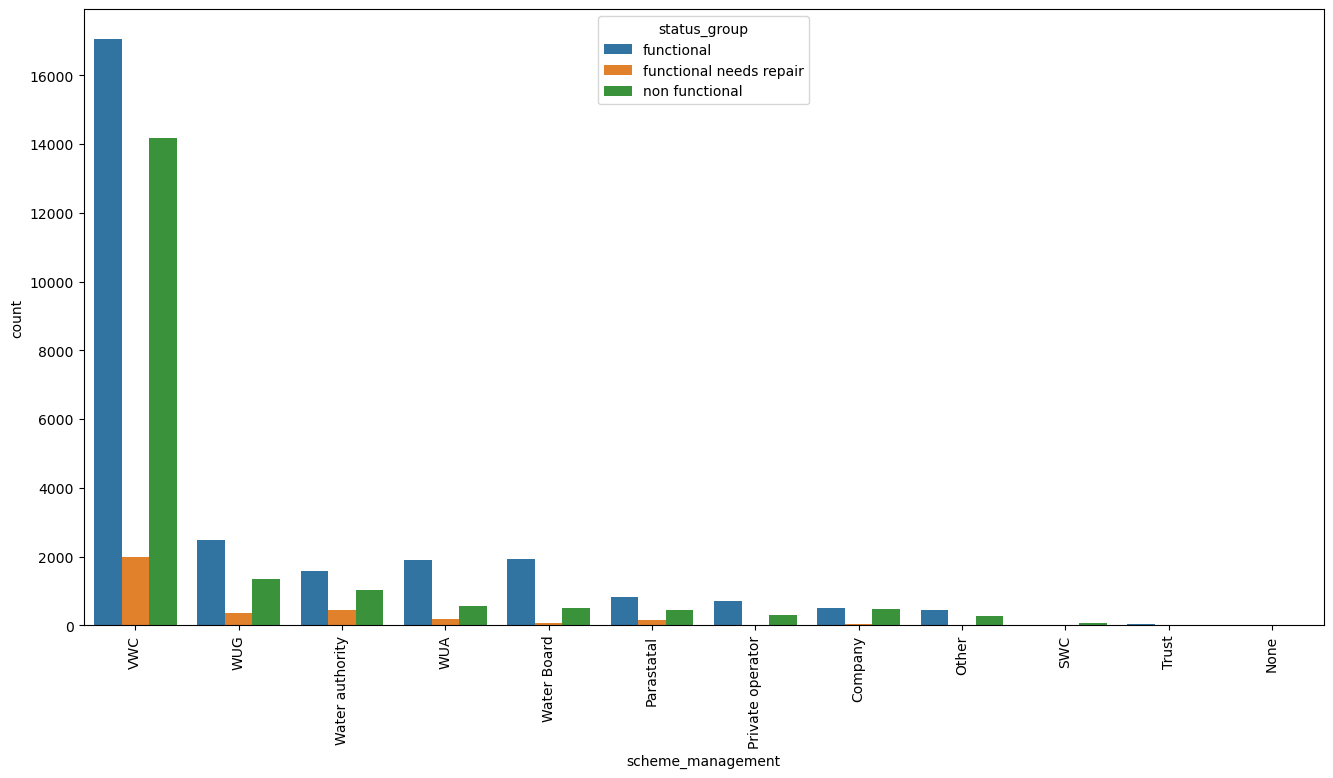

In [65]:
# Visualise distribution of functional wells in scheme_management. 
plt.figure(figsize=(16,8))
sns.countplot(x= 'scheme_management', 
              hue= 'status_group', 
              data= Tz, 
              order=Tz.scheme_management.value_counts().index)\
             .set_xticklabels(Tz.scheme_management.value_counts().index, rotation=90);

The visualization indicates that a higher number of wells owned by management were functional.

### Relationship between status_group and quantity. 

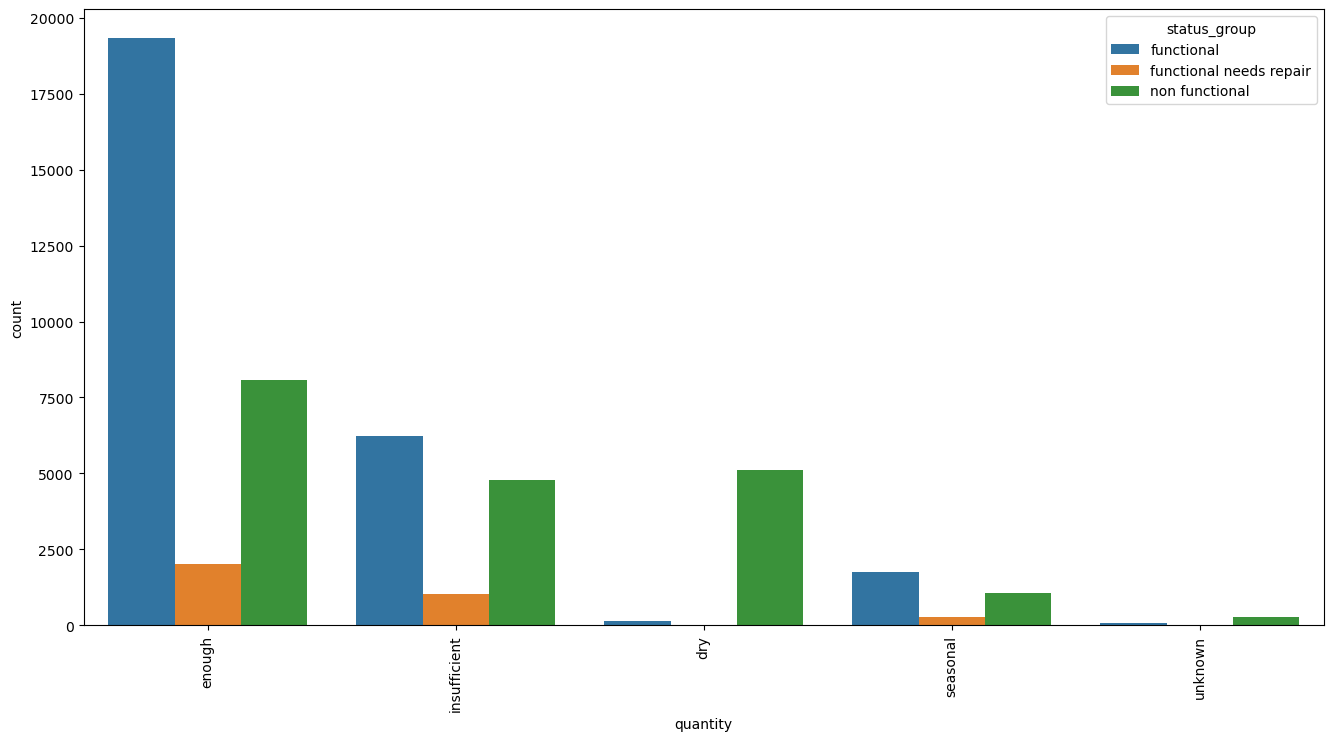

In [66]:
# Visualise distribution of functional wells in quantity categories
plt.figure(figsize=(16,8))
sns.countplot(x= 'quantity', hue= 'status_group', data= Tz, order=Tz.quantity.value_counts()
               .index).set_xticklabels(Tz.quantity.value_counts()
               .index, rotation=90);

According to the data above, there are more functional water points than non-functional and damaged ones at water points with ample, insufficient, and seasonal amount classifications. The number of non-functional water wells is greater than the number of functional wells at water points in the categories of unknown and dry amount.

### Relationship between region and status_group.

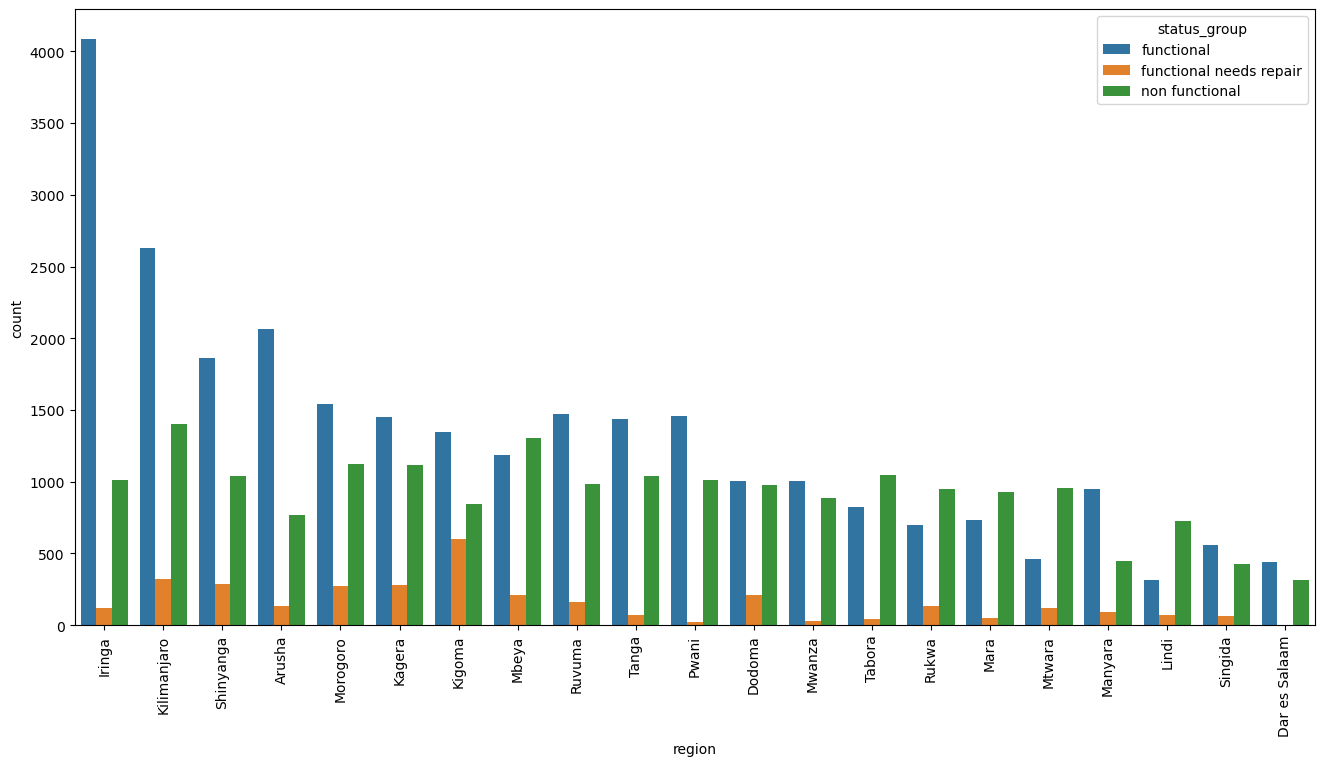

In [67]:
# count of functional and non-functional wells based on the basin.

fig = plt.subplots(figsize = (16,8))
sns.countplot(x= 'region', hue= 'status_group', data= Tz, 
              order=Tz.region.value_counts()\
              .index).set_xticklabels(Tz.region.value_counts()
               .index, rotation=90);

## 4.3 Multivariate Analysis. 

### Relationship between extraction_type_class and population with respect to waterpoint_type_group. 

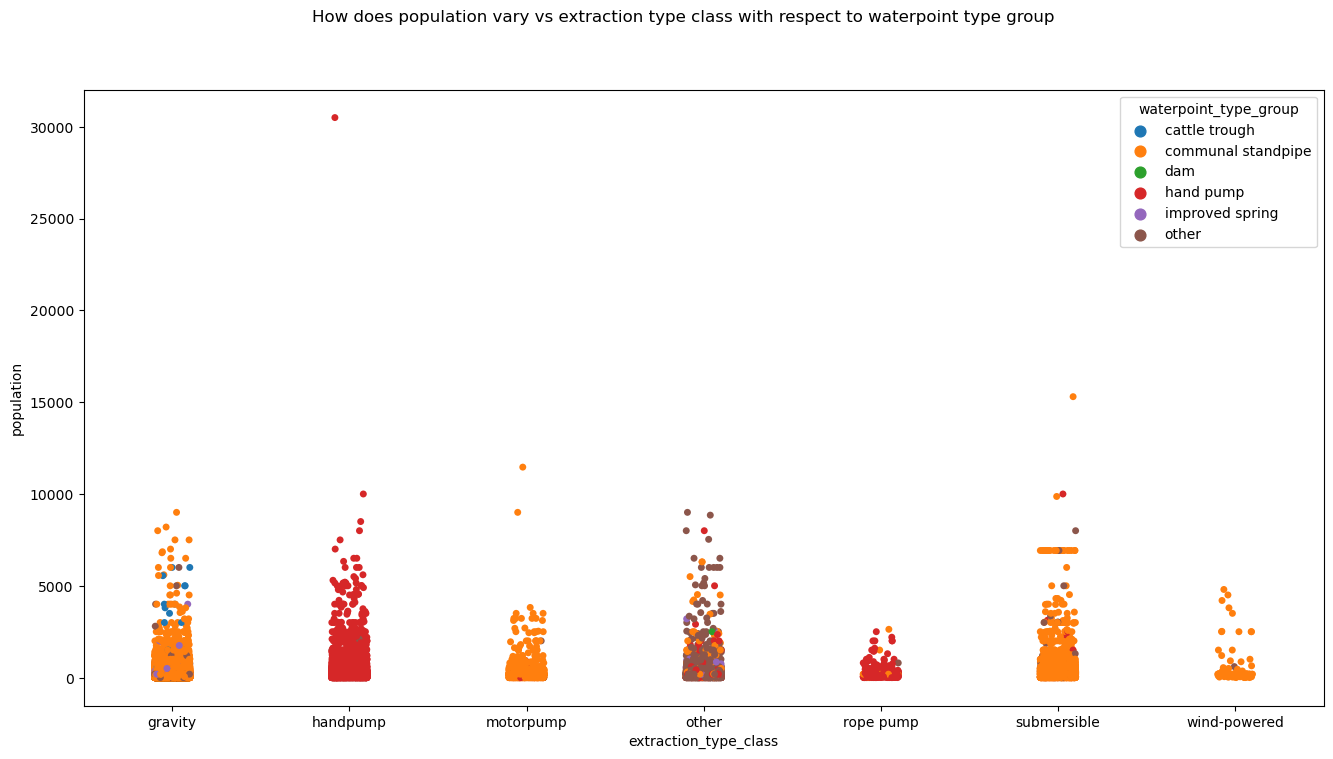

In [68]:
#plotting the relationship between extraction type class and population wrt waterpoint type group. 

plt.figure(figsize = (16, 8))
sns.stripplot(x="extraction_type_class", y="population", 
              data=Tz, 
              jitter=True,
              hue='waterpoint_type_group', )
plt.suptitle("How does population vary vs extraction type class with respect to waterpoint type group")
plt.show()

Communial standpipe was most commonly used in the more populated areas.

Methods of extraction that use more advanced technology have less population indicating probably that these areas are inhabited by more economically abled people. 

In [69]:
Tz.head()

,construction_year,longitude,latitude,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,funder,source_type,waterpoint_type_group,status_group,installer,date_recorded,basin,region,quantity,decade
0,1999,34.938093,-9.856322,1390,109.0,VWC,gravity,pay annually,soft,Roman,spring,communal standpipe,functional,Roman,2011-03-14,Lake Nyasa,Iringa,enough,90s
1,2010,34.698766,-2.147466,1399,280.0,Other,gravity,never pay,soft,Grumeti,rainwater harvesting,communal standpipe,functional,GRUMETI,2013-03-06,Lake Victoria,Mara,insufficient,10s
2,2009,37.460664,-3.821329,686,250.0,VWC,gravity,pay per bucket,soft,Lottery Club,dam,communal standpipe,functional,world vision,2013-02-25,Pangani,Manyara,enough,00s
3,1986,38.486161,-11.155298,263,58.0,VWC,submersible,never pay,soft,Unicef,borehole,communal standpipe,non functional,Unicef,2013-01-28,Ruvuma / Southern Coast,Mtwara,dry,80s
5,2009,39.172796,-4.765587,0,1.0,VWC,submersible,pay per bucket,salty,Mkinga Distric Coun,other,communal standpipe,functional,DWE,2011-03-13,Pangani,Tanga,enough,00s


### Relationship between quantity vs population with respect to source_type.

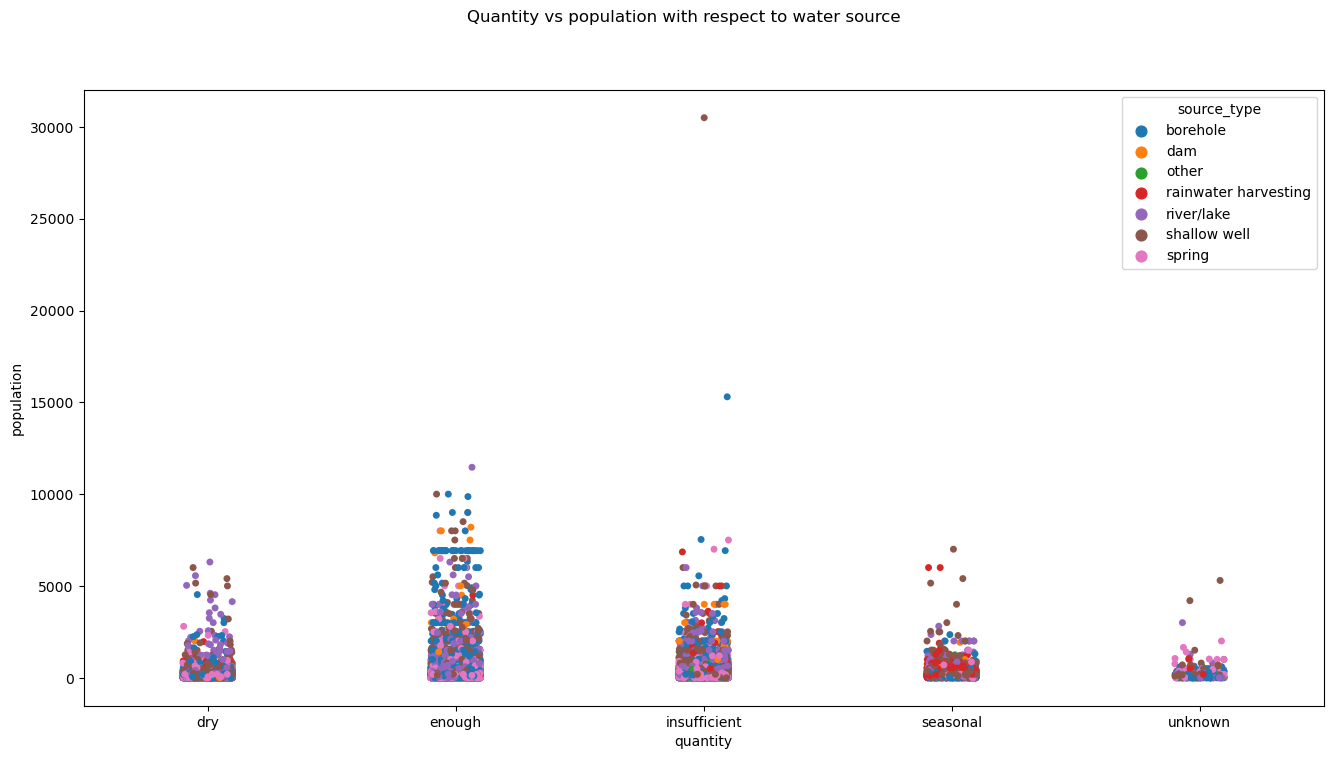

In [70]:
# Plotting quantity vs population with respect to source type.

plt.figure(figsize = (16, 8))
sns.stripplot(x="quantity", y="population",
              data=Tz, jitter=True,
              hue='source_type')
plt.suptitle("Quantity vs population with respect to water source")
plt.show()

### Relationship between quantity vs population with respect to Status_group.

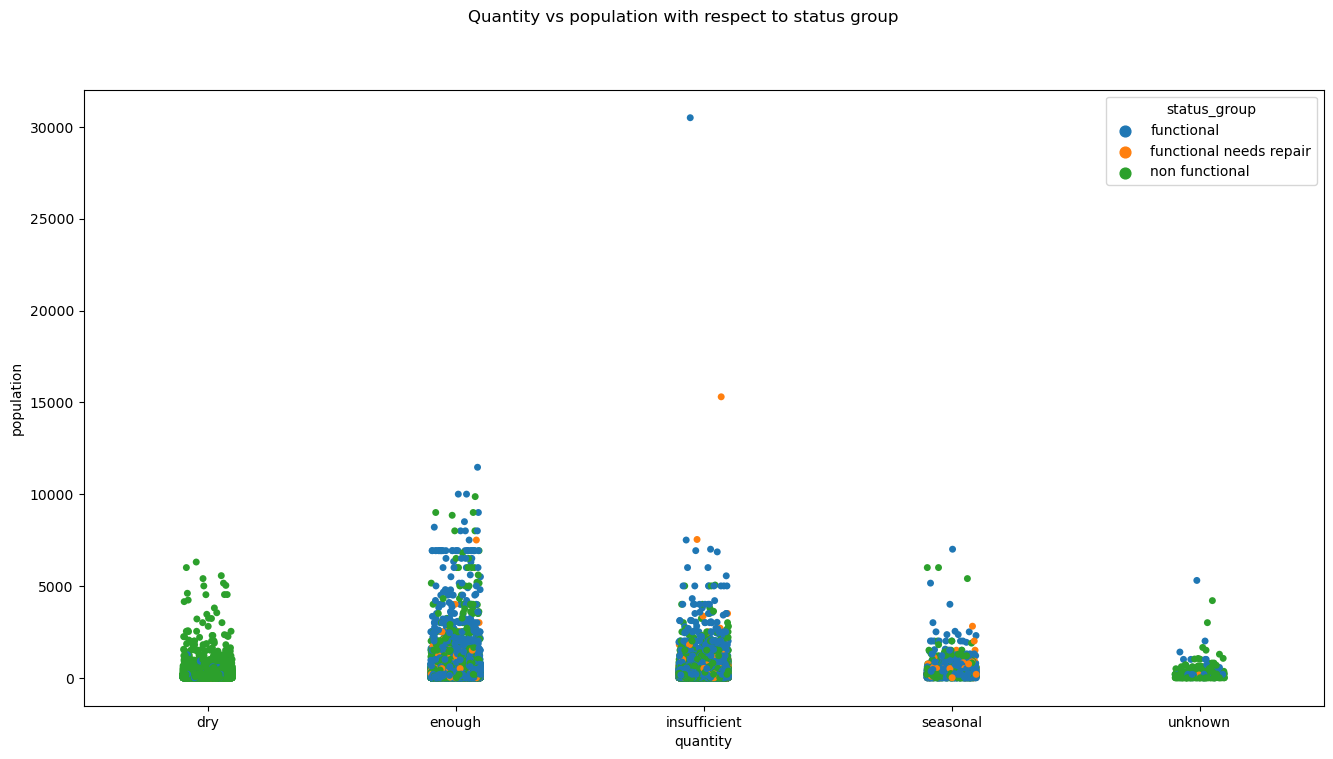

In [71]:
# Plotting quantity vs population with respect to status group.

plt.figure(figsize = (16, 8))
sns.stripplot(x="quantity", y="population",
              data=Tz, jitter=True,
              hue='status_group')
plt.suptitle("Quantity vs population with respect to status group")
plt.show()

The visualization indicates that non functional water wells lead to dry water quantities. 

Functional water wells were able to provide enough water to the population.

## 4.4 Findings.

The most common extraction type is gravity but second is hand pumps. The efficiency of handpumps are less than commercial pumps. It shows that authorities need to focus on pumping type. It is seen that, there are many non-functional water points which belongs to gravity (which is natural force so no need to do anything expensive) as extraction type.

Iringa is one of the important areas but it contains lots of non-functional wateer points which has soft water.

Government of Tanzania funds most of the waterpoints and are also among the top installers of water wells.

Communal standpipe seems to be the most popular waterpoint type.

Functional water wells were able to provide enough water to the population.

A majority of wells found in the most populated areas need repairs, probably due to scrumbling and overusage.

Majority of the functional wells provided enough water. However, there is an alarming number of non functional wells.

The functional water points wer the most populated. 

Most water points that are not paid for are non functional.

Wind powered and rope pump have the least amount of water available.

The most common extraction type is gravity followed by hand pumps.

## 4.5 Recommendations.

The Government of Tanzania should put proper measure to ensure the mantainance and functionality of their waterpoints as a big number of them are non functional or need reopairs. 

The Government of Tanzania should make effort to ensure availability of water to the sparsely populated areas too as most of these sparsely populated ares did not seem to have enough water. 

The Government should channel more funds towards communal standpipe as most of them are non functional.

# 5.0 MODELLING. 

In this section, the aim is to develop a predictive model using the available data to make accurate predictions or classifications. This involves selecting an appropriate machine learning algorithm, preparing the data for modeling, training the model on the training set, and evaluating its performance on the test set. The goal is to find a model that generalizes well to unseen data and provides reliable predictions or classifications.

## 5.1 Data preprocessing.

The main aim of the preprocessing stage of the machine learning workflow is to prepare the data for effective modeling. the focus is on normalizing the numerical columns to ensure that they are on a common scale. This step is crucial as it prevents features with large values from dominating those with smaller values, ensuring that all features have an equal influence on the measurement metric.

In [72]:
# Viewing our data once again.
Tz.head()

,construction_year,longitude,latitude,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,funder,source_type,waterpoint_type_group,status_group,installer,date_recorded,basin,region,quantity,decade
0,1999,34.938093,-9.856322,1390,109.0,VWC,gravity,pay annually,soft,Roman,spring,communal standpipe,functional,Roman,2011-03-14,Lake Nyasa,Iringa,enough,90s
1,2010,34.698766,-2.147466,1399,280.0,Other,gravity,never pay,soft,Grumeti,rainwater harvesting,communal standpipe,functional,GRUMETI,2013-03-06,Lake Victoria,Mara,insufficient,10s
2,2009,37.460664,-3.821329,686,250.0,VWC,gravity,pay per bucket,soft,Lottery Club,dam,communal standpipe,functional,world vision,2013-02-25,Pangani,Manyara,enough,00s
3,1986,38.486161,-11.155298,263,58.0,VWC,submersible,never pay,soft,Unicef,borehole,communal standpipe,non functional,Unicef,2013-01-28,Ruvuma / Southern Coast,Mtwara,dry,80s
5,2009,39.172796,-4.765587,0,1.0,VWC,submersible,pay per bucket,salty,Mkinga Distric Coun,other,communal standpipe,functional,DWE,2011-03-13,Pangani,Tanga,enough,00s


In [73]:
# Dropping columns not necessary for modelling.

Tz.drop(["construction_year",'funder',"installer","longitude","latitude","decade","date_recorded"],
            axis = 1,inplace = True)
# Viewing after dropping.

Tz.head()

,gps_height,population,scheme_management,extraction_type_class,payment,water_quality,source_type,waterpoint_type_group,status_group,basin,region,quantity
0,1390,109.0,VWC,gravity,pay annually,soft,spring,communal standpipe,functional,Lake Nyasa,Iringa,enough
1,1399,280.0,Other,gravity,never pay,soft,rainwater harvesting,communal standpipe,functional,Lake Victoria,Mara,insufficient
2,686,250.0,VWC,gravity,pay per bucket,soft,dam,communal standpipe,functional,Pangani,Manyara,enough
3,263,58.0,VWC,submersible,never pay,soft,borehole,communal standpipe,non functional,Ruvuma / Southern Coast,Mtwara,dry
5,0,1.0,VWC,submersible,pay per bucket,salty,other,communal standpipe,functional,Pangani,Tanga,enough


In [74]:
# Determining the predictor and target variables.

y = Tz.status_group

X = Tz.drop(["status_group"],axis = 1)


# Splitting the data to training set and testing set.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 22)

In [75]:
# Converting categorical variable into dummy variables for X_test.

X_test_categorical = pd.get_dummies( X_test.select_dtypes(include = ["category"]))


# Converting categorical variable into dummy variables for X_train.

X_train_categorical = pd.get_dummies(X_train.select_dtypes(include = ["category"]))



In [76]:
Tz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50154 entries, 0 to 59399
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gps_height             50154 non-null  int64   
 1   population             50154 non-null  float64 
 2   scheme_management      50154 non-null  category
 3   extraction_type_class  50154 non-null  category
 4   payment                50154 non-null  category
 5   water_quality          50154 non-null  category
 6   source_type            50154 non-null  category
 7   waterpoint_type_group  50154 non-null  category
 8   status_group           50154 non-null  category
 9   basin                  50154 non-null  category
 10  region                 50154 non-null  category
 11  quantity               50154 non-null  category
dtypes: category(10), float64(1), int64(1)
memory usage: 1.6 MB


In [77]:
# Concatenating Numerical values with dummy variables for X_test.

X_test_1 = pd.concat([X_test.select_dtypes(exclude = ["object"]),X_test_categorical],axis = 1)


# Concatenating Numerical values with dummy variables for X_train.

X_train_1 = pd.concat([X_train.select_dtypes(exclude = ["object"]),X_train_categorical,],axis = 1)


### OneHotEncoding.

In [78]:
from sklearn.preprocessing import OneHotEncoder

# Specify the list of categorical column names
categorical_columns = ['scheme_management', 'extraction_type_class', 'payment', 'water_quality', 'source_type',
                       'waterpoint_type_group', 'basin', 'region', 'quantity']

# Specify the list of numeric column names
numeric_columns = ['gps_height', 'population']

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns in X_train_1
X_train_encoded = encoder.fit_transform(X_train_1[categorical_columns])

# Transform the categorical columns in X_test_1
X_test_encoded = encoder.transform(X_test_1[categorical_columns])

# Convert the encoded data to an array
X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

# Concatenate the encoded data with the remaining numeric columns
X_train_scaled = np.concatenate((X_train_encoded, X_train_1[numeric_columns]), axis=1)
X_test_scaled = np.concatenate((X_test_encoded, X_test_1[numeric_columns]), axis=1)


### Using Standard Scaler to Scale the data. 

In [79]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns in X_train_scaled
X_train_scaled_numeric = scaler.fit_transform(X_train_scaled[:, -len(numeric_columns):])

# Transform the numeric columns in X_test_scaled
X_test_scaled_numeric = scaler.transform(X_test_scaled[:, -len(numeric_columns):])

# Concatenate the scaled numeric columns with the encoded categorical columns
X_train_scaled = np.concatenate((X_train_scaled[:, :-len(numeric_columns)], X_train_scaled_numeric), axis=1)
X_test_scaled = np.concatenate((X_test_scaled[:, :-len(numeric_columns)], X_test_scaled_numeric), axis=1)


### LabelEncoding.

The LabelEncoder is used for encoding the target variable. 

In [80]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable in y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the target variable in y_test
y_test_encoded = label_encoder.transform(y_test)


In [81]:
# Decode the label-encoded values for y_train.

y_train_decoded = label_encoder.inverse_transform(y_train_encoded)

# Print the label-encoded values for y_train.

y_train_series = pd.Series(y_train_encoded)
print(y_train.value_counts())
print("\n")
print(y_train_series.value_counts())

functional                 22015
non functional             15515
functional needs repair     2593
Name: status_group, dtype: int64


0    22015
2    15515
1     2593
dtype: int64


In [82]:
# Decode the label-encoded values for y_test
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

# Print the label-encoded values for y_test
y_test_series = pd.Series(y_test_encoded)
print(y_test.value_counts())
print("\n")
print(y_test_series.value_counts())

functional                 5528
non functional             3794
functional needs repair     709
Name: status_group, dtype: int64


0    5528
2    3794
1     709
dtype: int64


For the purpose of the target variable:

0 represents functional wells

2 represents non functional wells

1 represents functional needs repair

### Smote.

The purpose of SMOTE (Synthetic Minority Over-sampling Technique) is to address class imbalance in a dataset by generating synthetic examples of the minority class.

In [83]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)

# Print the shape of the resampled data
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")


Shape of X_train_resampled: (66045, 84)
Shape of y_train_resampled: (66045,)


### Modeling.

This section is meant to determine the most suitable machine learning model that will effectively recognize patterns of the wells and give predictions.

Models used:

Logistic regression

RandomForest

KNearestNeighbours

Xg boost

GridSearch will be used to determine the best set of hyperparameters for the models. 

### Logistic regression. 

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate logistic regression
logreg = LogisticRegression(random_state=42, multi_class="multinomial", class_weight="balanced")

# Fit logistic regression
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
log_training_preds = logreg.predict(X_train_resampled)
log_test_preds = logreg.predict(X_test_scaled)

# Calculate accuracy for training and test sets
log_training_accuracy = accuracy_score(y_train_resampled, log_training_preds)
log_test_accuracy = accuracy_score(y_test_encoded, log_test_preds)

print('Training Accuracy: {:.4}%'.format(log_training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(log_test_accuracy * 100))


Training Accuracy: 64.57%
Test Accuracy: 62.79%


The training accuracy of 64.57% means that the logistic regression model correctly predicted the target variable for 64.57% of the instances in the training set. The test accuracy of 62.79% indicates that the model achieved a similar level of accuracy on unseen data from the test set.

Below, calculating precision, recall, and F1-score for each class in the target variable based on the predictions made by the logistic regression model on the test set. It provides a more detailed evaluation of the model's performance beyond just accuracy.

In [85]:
from sklearn.metrics import classification_report

# Calculate predictions on the test set
log_test_preds = logreg.predict(X_test_scaled)

# Generate classification report
classification_report = classification_report(y_test_encoded, log_test_preds)

# Print the classification report
print(classification_report)


              precision    recall  f1-score   support

           0       0.78      0.64      0.70      5528
           1       0.18      0.64      0.28       709
           2       0.76      0.61      0.68      3794

    accuracy                           0.63     10031
   macro avg       0.58      0.63      0.55     10031
weighted avg       0.73      0.63      0.66     10031



The model shows varying performance across different classes, with higher accuracy, precision, recall, and F1-score for class 0 and class 2 compared to class 1.

#####  Performing a grid search for hyperparameter tuning in logistic regression:

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logreg = LogisticRegression(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.6427587251116663


The best combination of hyperparameters found during the grid search is {'C': 10.0, 'penalty': 'l2', 'solver': 'saga'}. This means that the optimal value of the regularization parameter C is 10.0, the penalty term used is L2 regularization (ridge), and the solver algorithm used is 'saga'.

Best Score: The best score achieved during the grid search is 0.6427587251116663. This score represents the mean cross-validated accuracy of the model with the best parameters.

Overall, these results indicate that the logistic regression model performed the best with the specified hyperparameters. 

 ##### Creating a logistic regression model using the best parameters from the grid search and evaluate it on the test data:

In [87]:
from sklearn.metrics import classification_report

# Create a logistic regression model with the best parameters
best_logreg = LogisticRegression(random_state=42, C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])

# Fit the model on the training data
best_logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_test_pred = best_logreg.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test_encoded, y_test_pred))


              precision    recall  f1-score   support

           0       0.78      0.64      0.70      5528
           1       0.18      0.64      0.28       709
           2       0.76      0.61      0.68      3794

    accuracy                           0.63     10031
   macro avg       0.58      0.63      0.55     10031
weighted avg       0.73      0.63      0.66     10031



##### Calculating and visualizing the confusion matrix using scikit-learn.

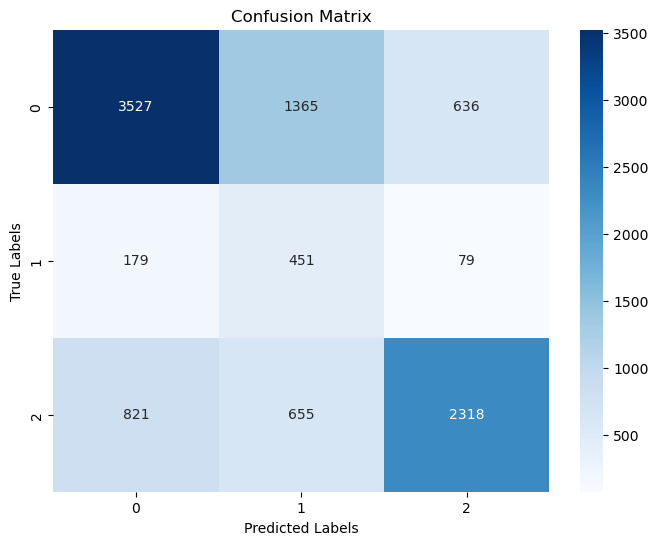

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### KNeighborsClassifier.

In [89]:
# Importing KNeighborsClassifier library
from sklearn.neighbors import KNeighborsClassifier

In [90]:
from sklearn.metrics import recall_score,accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix

#instantiate baseline model
knn_clf = KNeighborsClassifier()

#fit KNearest Neighbors
knn_clf.fit(X_train_resampled, y_train_resampled)

#predict on the test set
y_hat_train = knn_clf.predict(X_train_resampled)
y_hat_test = knn_clf.predict(X_test_scaled)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train_resampled, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test_encoded, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

Train accuracy: 82.18487394957982
Test accuracy: 69.77370152527166


##### Initializing Grid Search.

In [91]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier with chosen hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit the model on the training data
knn_clf.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = {'n_neighbors': knn_clf.n_neighbors, 'weights': knn_clf.weights}


##### Instantiating KNeighborsClassifier model using the best parameters from the grid search.

In [92]:
# Instantiating KNeighborsClassifier model using the best parameters from the grid search

best_knn = KNeighborsClassifier(n_neighbors = 5, weights = "distance")

# Fitting the model
best_knn.fit(X_train_resampled,y_train_resampled)

KNeighborsClassifier(weights='distance')

##### Predicting the model on training and test sets.

In [93]:
# Predict on training and test sets.
best_knn_training_preds = best_knn.predict(X_train_resampled)
best_knn_preds = best_knn.predict(X_test_scaled)


# Accuracy of training and test sets.
best_knn_training_accuracy = accuracy_score(y_train_resampled, best_knn_training_preds)
best_knn_test_accuracy = accuracy_score(y_test_encoded, best_knn_preds)

print('Training Accuracy: {:.4}%'.format(best_knn_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_knn_test_accuracy * 100))

Training Accuracy: 92.53%
Validation accuracy: 70.66%


### Random Forest Classifier.

In [94]:
# Importing RandomForestClassifier library
from sklearn.ensemble import RandomForestClassifier

In [95]:
# instantiating RandomForestClassifier
RF = RandomForestClassifier()
# Fitting RandomForestClassifier
RF.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
RF_training_preds = RF.predict(X_train_resampled)
RF_test_preds = RF.predict(X_test_scaled)

# Accuracy of training and test sets
RF_training_accuracy = accuracy_score(y_train_resampled, RF_training_preds)
RF_test_accuracy = accuracy_score(y_test_encoded, RF_test_preds)

print('Training Accuracy: {:.4}%'.format(RF_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(RF_test_accuracy * 100))

Training Accuracy: 93.81%
Validation accuracy: 73.08%


This Random forest baseline model is overfitting the training data so we are going to do a grid search to get the best hyperparameters that would reduce overfitting.

In [96]:
# Creating a parameter grid
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']}

In [97]:
# Grid searching
RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5)
RF_CV.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [98]:
# Getting the best hyperparameters for our RandomForestClassifier
RF_CV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

In [99]:
# Instantiating RandomForestClassifier model using the best parameters from the grid search
best_forest = RandomForestClassifier(criterion = 'entropy',max_depth = 6, max_features= 'sqrt',
                                     n_estimators = 200)


In [100]:
# Fitting the model
best_forest.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       n_estimators=200)

In [101]:
# Predict on training and test sets
best_forest_training_preds = best_forest.predict(X_train_resampled)
best_forest_preds = best_forest.predict(X_test_scaled)


# Accuracy of training and test sets
best_forest_training_accuracy = accuracy_score(y_train_resampled, best_forest_training_preds)
best_forest_test_accuracy = accuracy_score(y_test_encoded, best_forest_preds)

print('Training Accuracy: {:.4}%'.format(best_forest_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_forest_test_accuracy * 100))

Training Accuracy: 65.09%
Validation accuracy: 60.6%


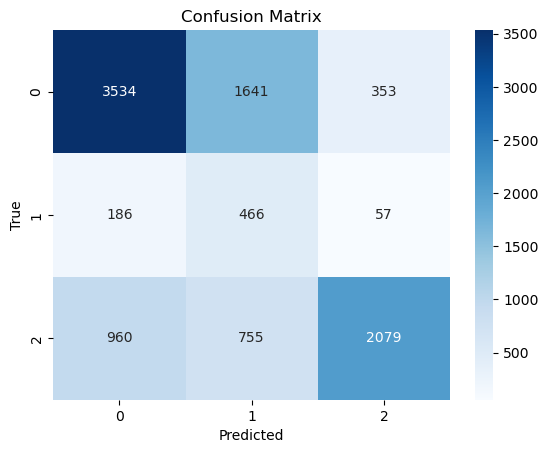

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the test set
confusion_matrix_result = confusion_matrix(y_test_encoded, best_forest_preds)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")

# Set the axis labels
plt.xlabel("Predicted")
plt.ylabel("True")

# Add a title
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [103]:
# Predict on training and test sets
best_forest_training_preds = best_forest.predict(X_train_resampled)
best_forest_preds = best_forest.predict(X_test_scaled)


# Accuracy of training and test sets
best_forest_training_accuracy = accuracy_score(y_train_resampled, best_forest_training_preds)
best_forest_test_accuracy = accuracy_score(y_test_encoded, best_forest_preds)

print('Training Accuracy: {:.4}%'.format(best_forest_training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(best_forest_test_accuracy * 100))

Training Accuracy: 65.09%
Validation accuracy: 60.6%


The hyperparameter tuned random forest model seems to underfit the training data therefore we will use another machine learning algorithm.

### Gradient Boost Classifier.

In [104]:
# Importing GradientBoostingClassifier library
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Instantiate baseline model
gradient_boost_clf = GradientBoostingClassifier(random_state=21)

# Fit GradientBoostingClassifier model
gradient_boost_clf.fit(X_train_resampled, y_train_resampled)

# Predict y values
y_hat_train = gradient_boost_clf.predict(X_train_resampled)
y_hat_test = gradient_boost_clf.predict(X_test_scaled)

# Calculate train accuracy
gradient_boost_train_accuracy_baseline = accuracy_score(y_train_resampled, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy_baseline))

# Calculate test accuracy
gradient_boost_test_accuracy_baseline = accuracy_score(y_test_encoded, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy_baseline))


Train accuracy: 71.15451586039822
Test accuracy: 66.00538331173362


The GradientBoostingClassifier model seems to slightly overfit but it doesn't meet our target range.

Thus we will try to tune our hyperparameter to see if we can meet our target range.

In [106]:
# set param grid
gradient_boost_param_grid = {'learning_rate': [0.025, 0.05],
                            'subsample': [0.5, 1.0]}

#gridsearch
gradient_boost_gridsearch = GridSearchCV(estimator = gradient_boost_clf,
                                        param_grid = gradient_boost_param_grid, 
                                        scoring = 'accuracy',
                                        n_jobs = -1,
                                        cv = 5)

# fitting the model
gradient_boost_gridsearch.fit(X_train_resampled, y_train_resampled)

# best param
gradient_boost_gridsearch.best_params_

{'learning_rate': 0.05, 'subsample': 0.5}

This means that the best combination of hyperparameters found during the grid search is a learning rate of 0.05 and a subsample of 0.5. These hyperparameters are considered to optimize the performance of the Gradient Boosting classifier based on the specified scoring metric 

In [107]:
#train a classifier with optimal values identified above
gradient_boost_clf = GradientBoostingClassifier(random_state = 21,
                                                max_depth = 40,
                                                max_features = 'auto',
                                                min_samples_leaf = 3,
                                                min_samples_split = 8,
                                                n_estimators = 100,
                                                learning_rate = 0.05,
                                                subsample = 0.5)
# fitting the model
gradient_boost_clf.fit(X_train_resampled, y_train_resampled)

#predict
y_hat_train = gradient_boost_clf.predict(X_train_resampled)
y_hat_test = gradient_boost_clf.predict(X_test_scaled)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train_resampled, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test_encoded, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

Train accuracy: 93.59527594821712
Test accuracy: 73.6417106968398


### Evaluation and interpretation of the best model.

The best overall model is the Gradient boost Classifier baseline model. This model has an accuracy of 93.59527% on the testing data. This implies that if a class is predicted as functional this will be correct 93% of the time. This model was selected because it didn't have the highest training accuracy nor validation accuracy score it had the most minor difference between the training and the validation accuracy therefore the model will not perform very poorly when unseen data is used. It is the least overfitting model that meets our success criteria.